# Evaluation Project - 1
Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [103]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Importing all the necessary libraries here.

In [2]:
!pip install xgboost

In [3]:
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv('baseball.csv')

In [5]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In the above cell we are taking a look at our dataset which seems to be very small but due to the columns not being descriptive we are unable to understand the content much. We will take help from the Wikipedia link that was provided to get further insights on our dataset during it's analysis process.

However in the problem statement itself we have the below information given to us.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output label: Number of predicted wins (W)

# Exploratory Data Analysis (EDA)

In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Here we have listed all the column names present in our data that is not making much sense and will need deciphering to be converted into understandable format.

Pitching statistics:

W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

RA – Run average: number of runs allowed times nine divided by innings pitched

ER – Earned run: number of runs that did not occur as a result of errors or passed balls

ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

CG – Complete game: number of games where player was the only pitcher for their team

SHO – Shutout: number of complete games pitched with no runs allowed

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

Batting statistics:

R – Runs scored: number of times a player crosses home plate

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

H – Hit: reaching base because of a batted, fair ball without error by the defense

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

K – Strike out (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.

Baserunning statistics:

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

R – Runs scored: times reached home plate legally and safely
Fielding statistics:

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

Now that we have clearer understanding on what the abbreviation mean and that they come from different statistics we should be able to figure out the scoring procedure details.

In [7]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


After we were able to decipher the meaning of all the given abbreviations thanks to the Wikipedia page I have now replaced all the column names with their understandable full forms for understanding purpose.

Here we can clearly see that the "Wins" column is our target label and the remaining columns are our features that will determine and help us predicting the wins in a particular baseball game. As the target label "Wins" comprises of all continous data it makes this to be a Regression problem!

In [8]:
df.shape

(30, 17)

With the help of the shape method we can see that our dataset only has 30 rows and 17 columns and we will need to try and retain all the given information while building our ML model.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In the info method we are able to take a look at the data types of our dataset columns. It shows that we have 16 columns with integer datatype and 1 column with float datatype. Since there are no object datatype present in our dataset no encoding process will be needed.

In [10]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

we have no missing data in our dataset either so we won't have to worry about handling missing data either and can simply check for skewness and outlier details now.

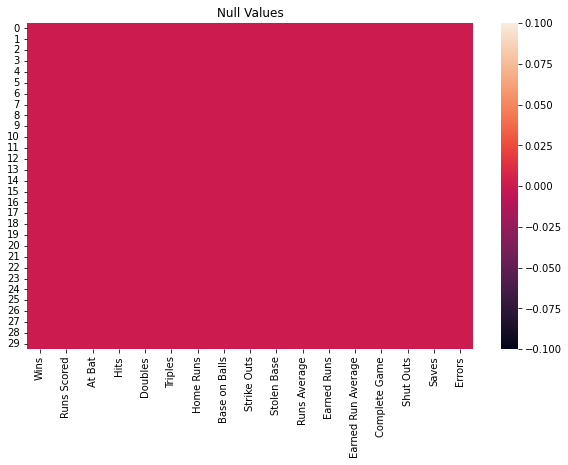

In [11]:
#Visualizeing null values
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

It shows there are no null values.

# Description of Dataset

In [12]:
# Statistical summary of dataset
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

The counts of all the columns are same, this means there are no null values present in any of the columns.

In the target column we can observe the mean is bit less than median(50%), so it is skewed to the left. Since the mean is 80.96 and maximum is 100, it means that the team won more matches.

In the column R(Runs) also median is more than the mean then it is skewed to left. these differences can also be seen in the columns 2B, BB, SO, RA, ER, ERA and SHO. These columns are skewed to left.

The mean is more than median in the columns AB, H, HR, SV and E which means they are skewed to right.

Also the mean and the meadian are same in the columns 3B and SB which means the data is normal or symmetrical. Also the feature CG has mean bit higher than the meadian so its almost normal.

There is a huge differences in max and 75% percentile(3rd quantile).

So from these observations we can conclude that the ourliers present in many of these columns. We will remove these outliers using some methods later.

In [13]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

The acceptable range for skewness is between +/-0.5. We see columns such as Runs Scored, Hits, Runs Average, Earned Runs, Earned Run Average, Complete Game, Saves and Errors being slightly out of this range.

We shall inspect further in regards to the skewness information to determin whether it needs to be treated or not.

In [14]:
df.nunique()

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut Outs             12
Saves                 20
Errors                21
dtype: int64

Taking a look at all the unique values present in each of the columns in our dataset. It shows that there are no categorical data since even the unique numbers are large in number and cannot be segregated or combined.

In [15]:
# Checking the uniqueness of dataset
df['Wins'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

These are the unique values present in the target variable'Wins'.

In [16]:
# List of values in the target variable
df["Wins"].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: Wins, dtype: int64

This gives the list of values in the target variable which has int64 data type.

In [17]:
# Checking wheather the dataset contains any space
df.loc[df['Wins']==" "]

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors


It seems that there are no spaces in the dataset.

# Visualization

# Univariate Analysis

1)Strip Plot

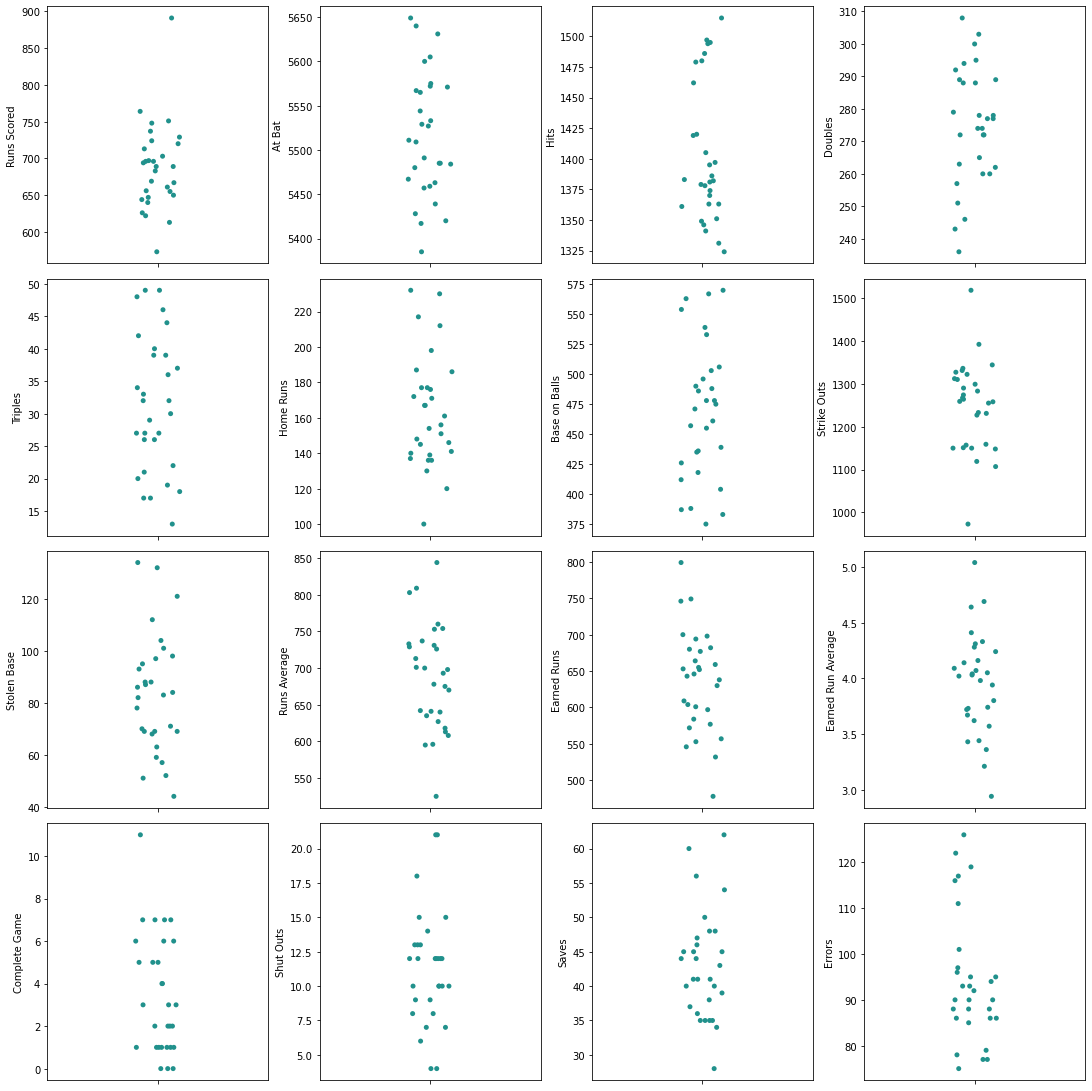

In [18]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index], palette="viridis")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

With the help of above strip plot we are able to take a look at data point distribution across the data set and it's range details. We can see columns Runs Scored, Strike Outs, Complete Game with single data points further away from the general accumulation indicating towards the presence of ouliers.

2)Box Plot

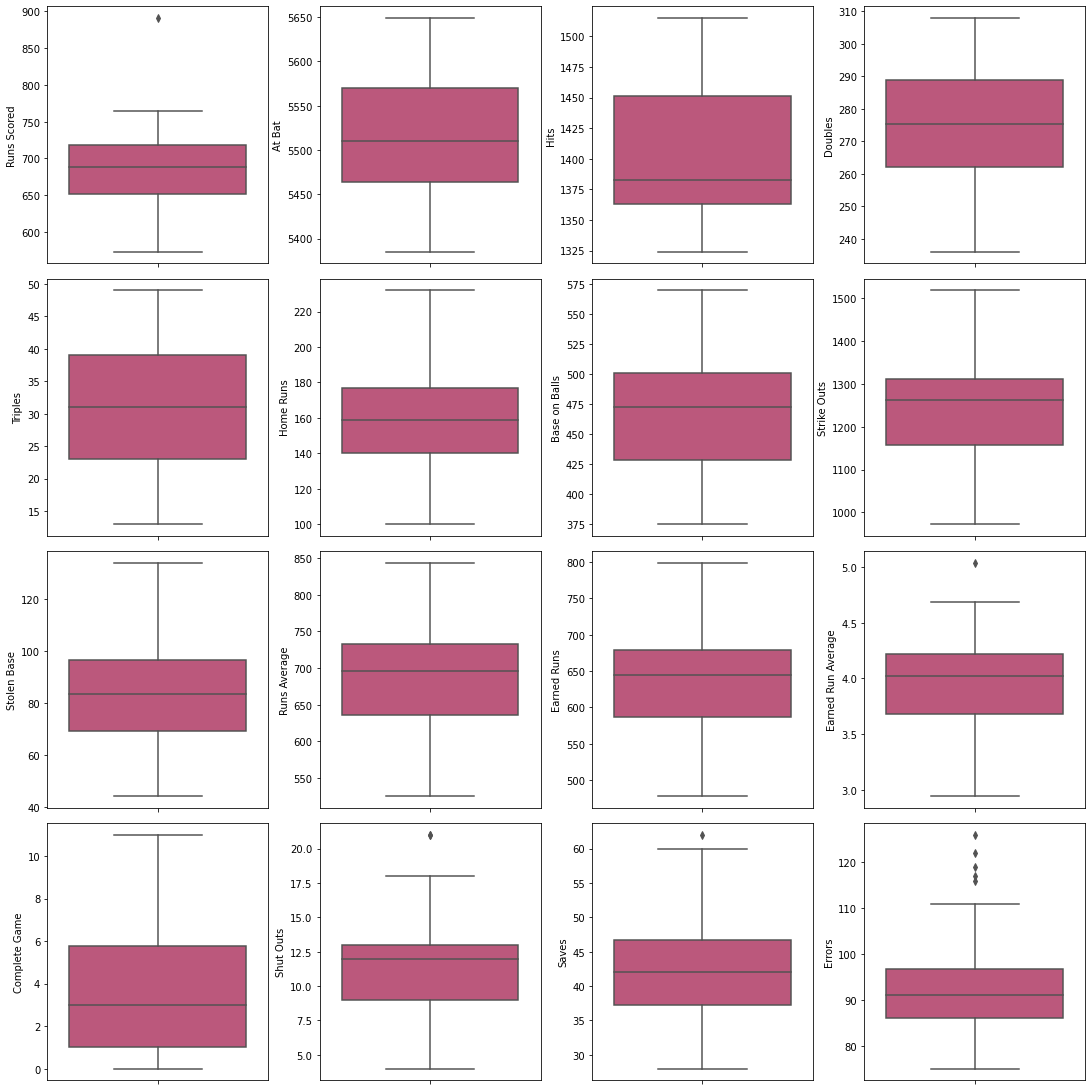

In [19]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

The above box plot representation clearly shows few outlier points present in Runs Scored, Earned Run Average, Shut Outs, Saves and Errors. These will need to be treated further before building our machine learning model.

3)Distribution Plot

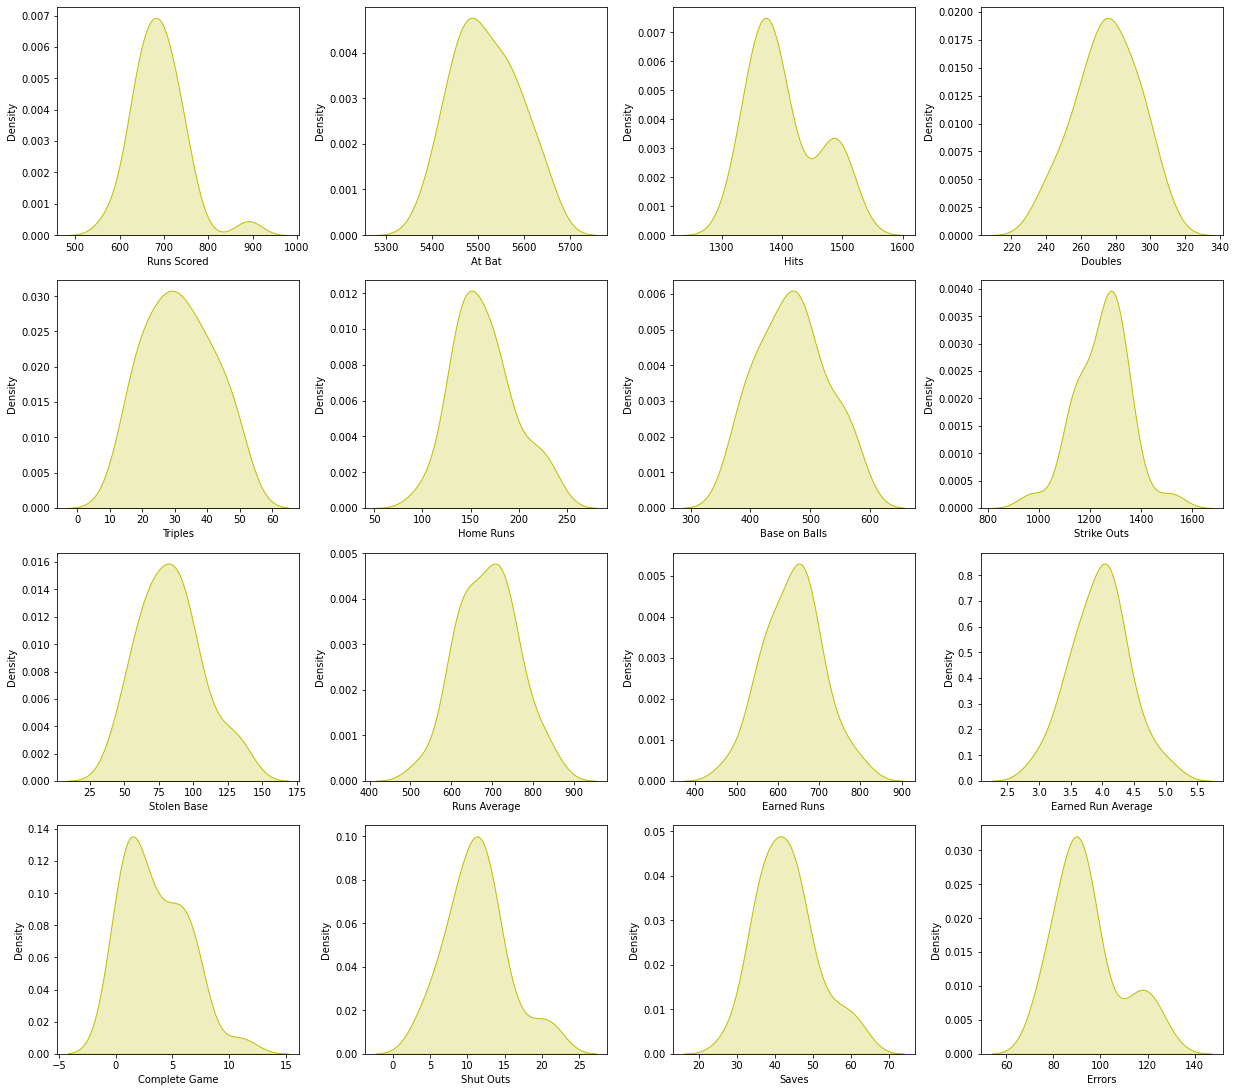

In [20]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From the above distplots we can observe that most of the columns are normally distributed and some of them have skewness too.

From the distplot we can observe the following

The target column 'W'(wins) looks normally distributed and also we can observe there is no skewness. So from the graph it is clear that the winning rate is between 63 to 100 and mean of W is 80.

The data in the feature 'R'(Runs) is not normal and the median is more than the mean so it is skewed to left. The run rate lies between 570-890. These differences can also be seen in the columns 'BB'(Walks), 'SO'(strike outs), 'RA'(Runs allowed), 'ERA'(Earned run average), 'SHO'(Shutouts). Eventhough they looks normal but has skewness.

The data in the feature 'AB'(At Bats) looks normally distributed and has no skewness. The value of AB mostly lies between 5300-5650.

The data in the features 'H'(Hits), 'HR'(homeruns),'SV'(saves) and 'E'(errors) are not normal and the mean is more than the median which means skewed to right.

'2B'(doubles) also looks normal and bit skewness present since the median is bit more than mean. The doubles rate is between 230-300.

The mean and the meadian is almost same in the feature columns '3B'(tribles) and 'SB'(Stolen Bases) the data is normally distributed and there is no skewness. Also the column 'CG'(complete games) is looks almost normal and has no skewness
The column 'ER'(Earned Runs) is normal and has no skewness.

# Bivariate analysis

1)Line Plot

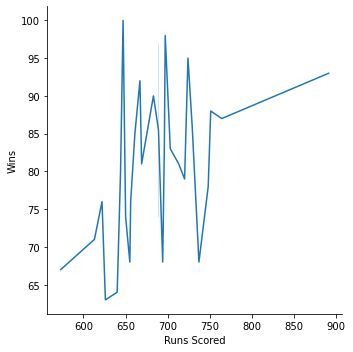

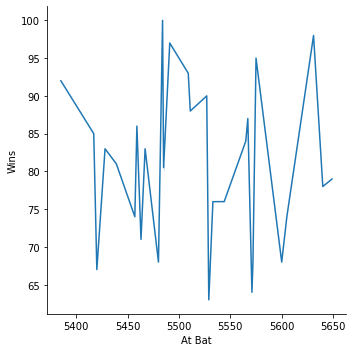

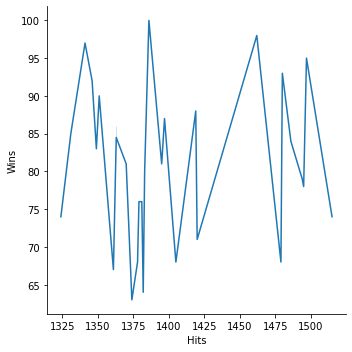

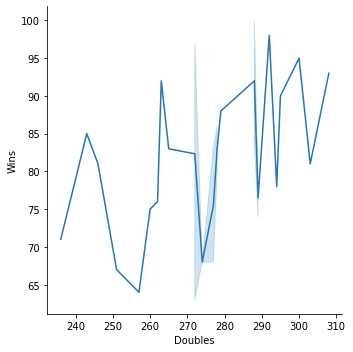

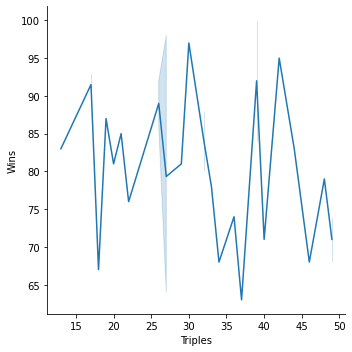

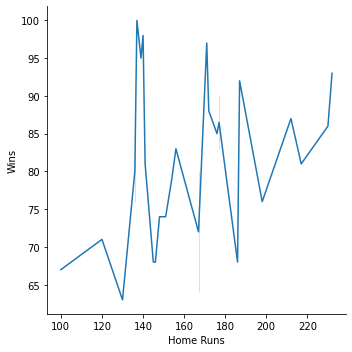

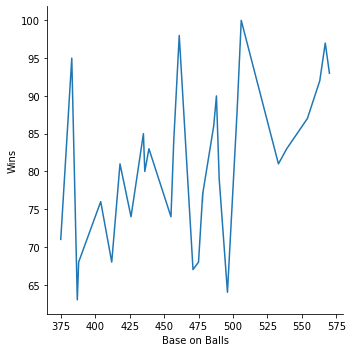

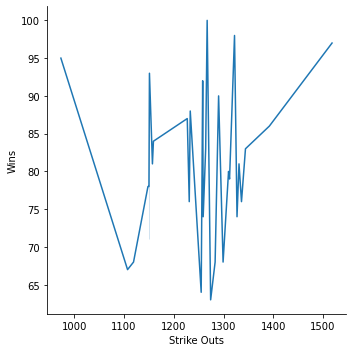

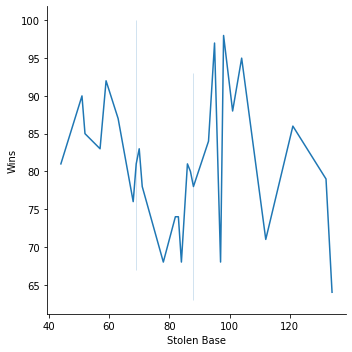

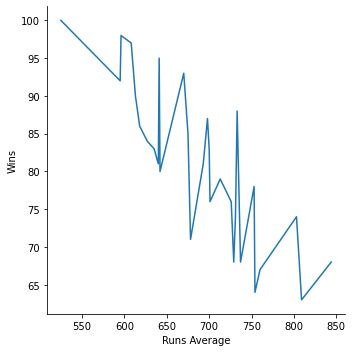

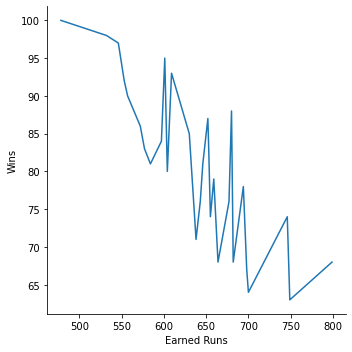

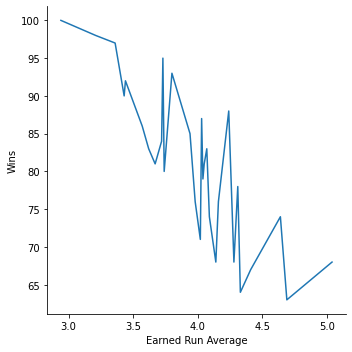

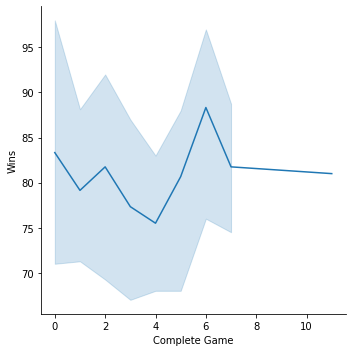

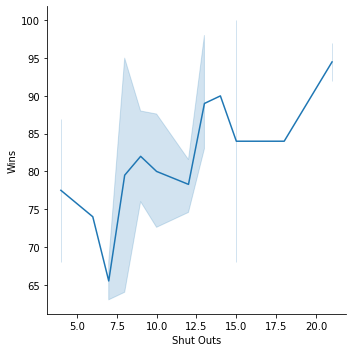

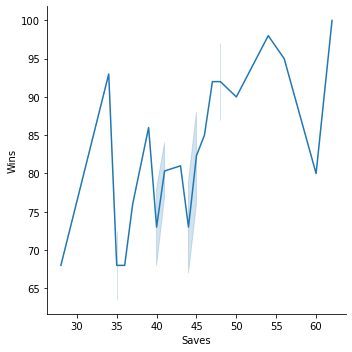

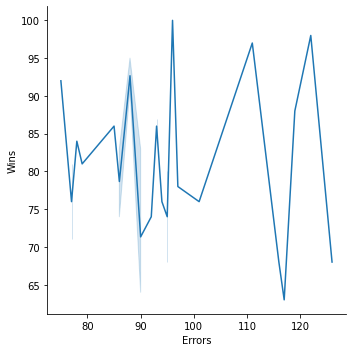

In [21]:
index = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index += 1
plt.show()

By taking a look at all the line plots corresponding to the "Wins" column shows how those feature are related with the contribution on getting those particular numbers. Some of them are directly proportional while others are either inversely proportional to our label or do not have much to offer.

Therefore we can say that the relationships between the label and all the features can be viewed from above graphs: All of the above features (except the errors) are positively correlated with our label In case the number of runs increases then the chance of win increases obviously In case the doubles increase then the chance of win increases In case the triples increases then the chance of win increases In case the home runs increases then the chance of win increases In case the walks on balls increases then the chance of win increases In case the strike outs increases then the chance of win increases for the opposite team In case the stolen bases increases then the chance of win increases again for the opposite team In case the runs allowed increases then the chance of win increases In case the earned run and earned run average increases the chance of win increases automatically

2)Bar Plot

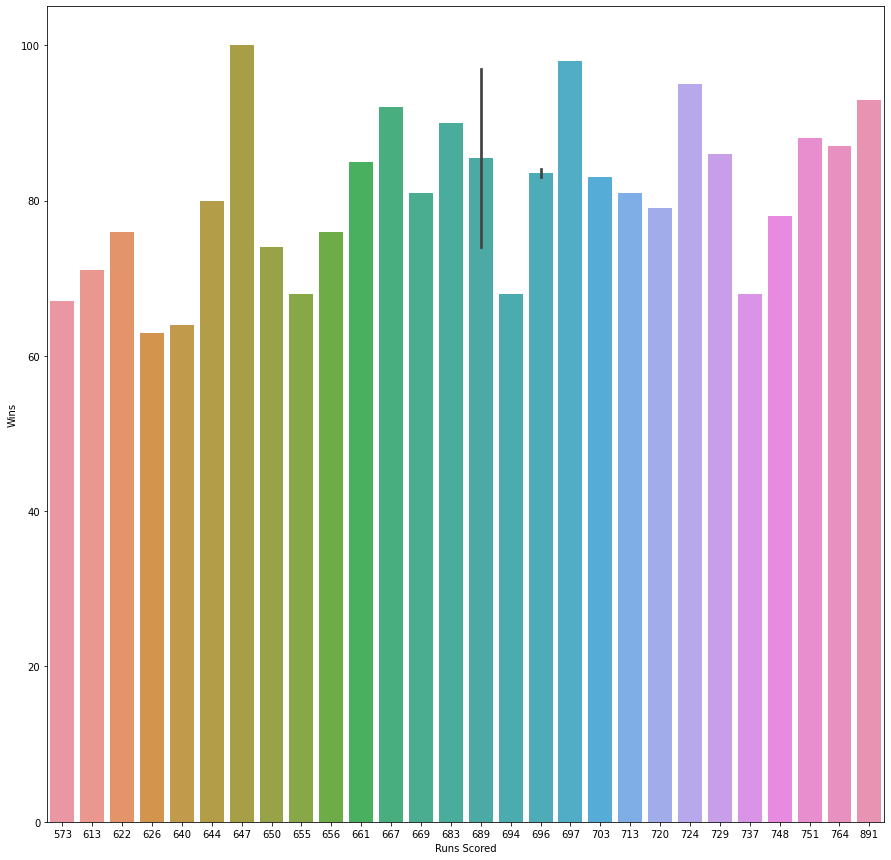

In [22]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Scored", y="Wins", data=df)
plt.show()

Feature "Runs Scored" and it's unique values are distributed unevenly when it comes to relating with our label "Wins"

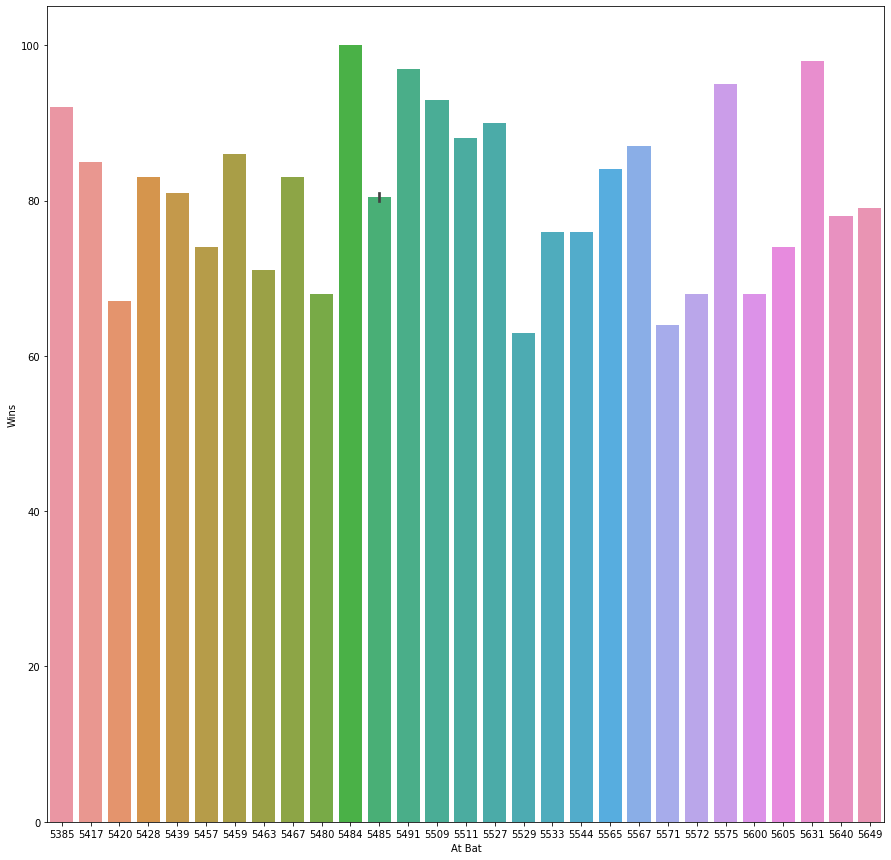

In [23]:
plt.figure(figsize=(15,15))
sns.barplot(x="At Bat", y="Wins", data=df)
plt.show()

Feature "At Bat" and it's unique values are again distributed unevenly when it comes to relating with our label "Wins"

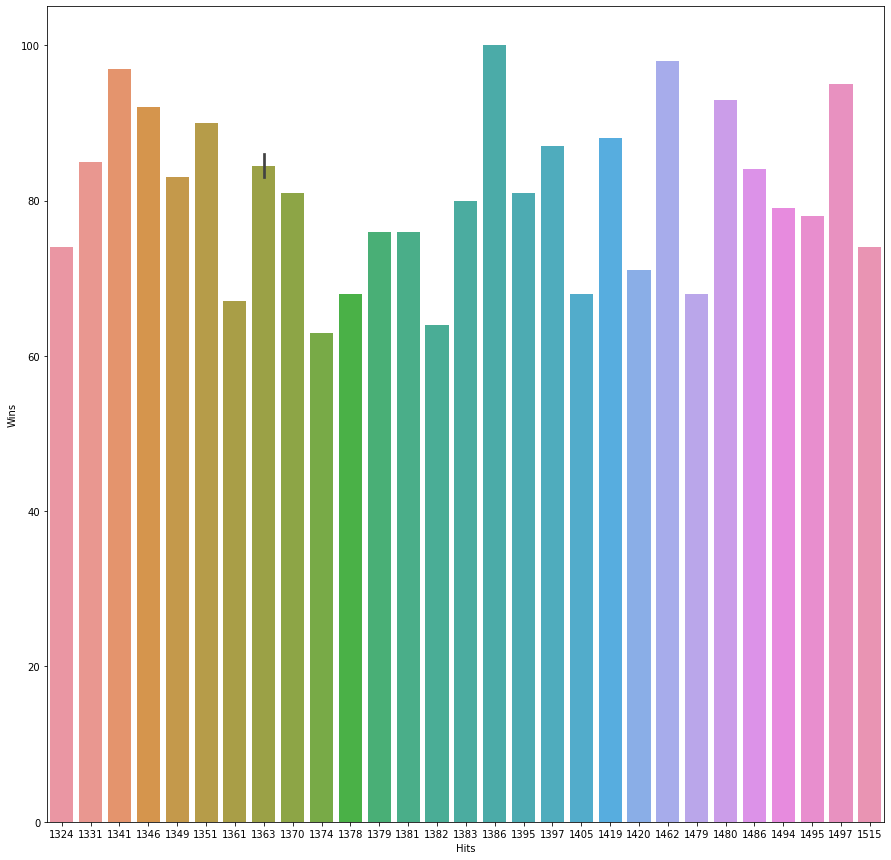

In [24]:
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Wins", data=df)
plt.show()

Feature "Hits" and it's unique values do not show any linear pattern when it comes to relating with our label "Wins"

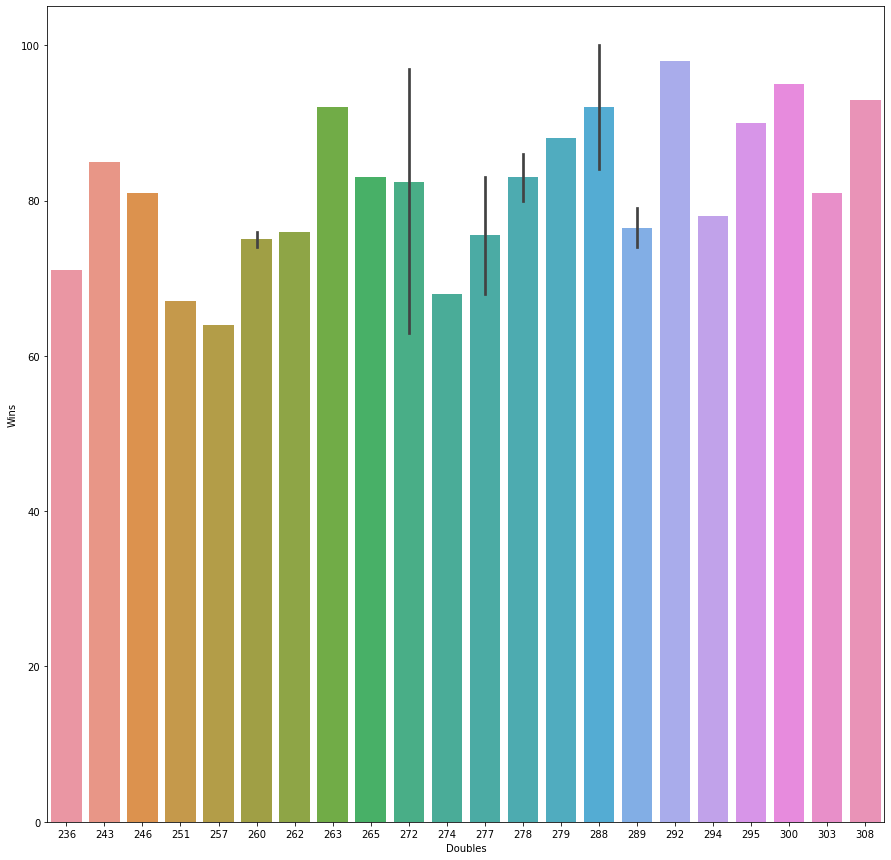

In [25]:
plt.figure(figsize=(15,15))
sns.barplot(x="Doubles", y="Wins", data=df)
plt.show()

Feature "Doubles" and it's unique values again do not form any definite pattern when it comes to relating with our label "Wins"

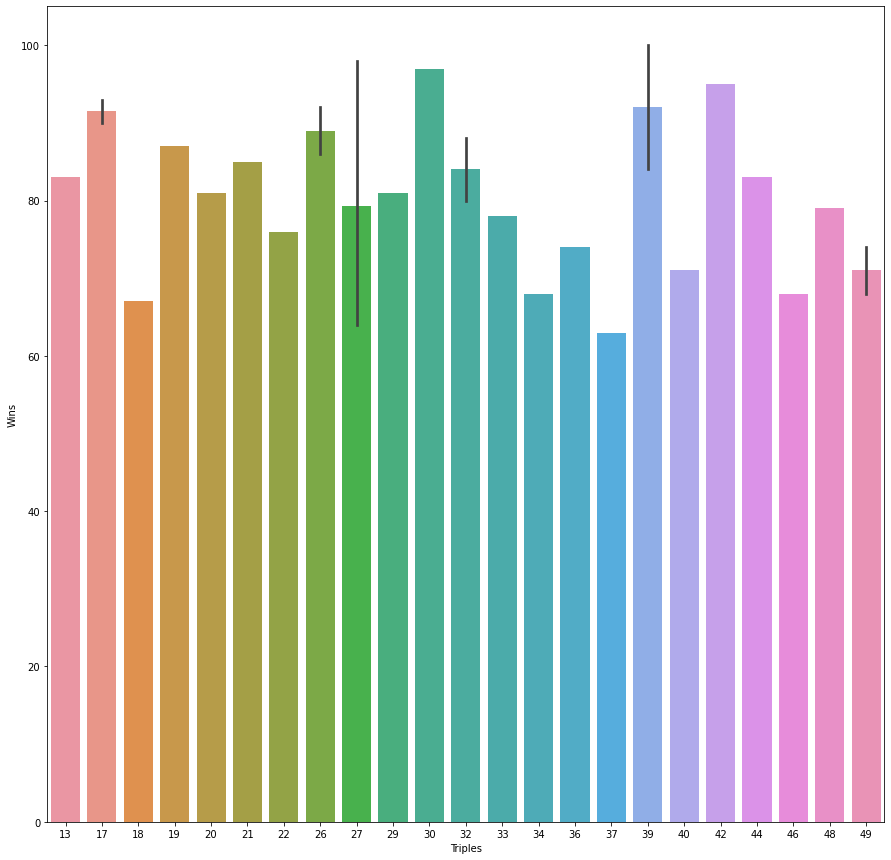

In [26]:
plt.figure(figsize=(15,15))
sns.barplot(x="Triples", y="Wins", data=df)
plt.show()

Feature "Triples" and it's unique values are distributed unevenly when it comes to relating with our label "Wins"

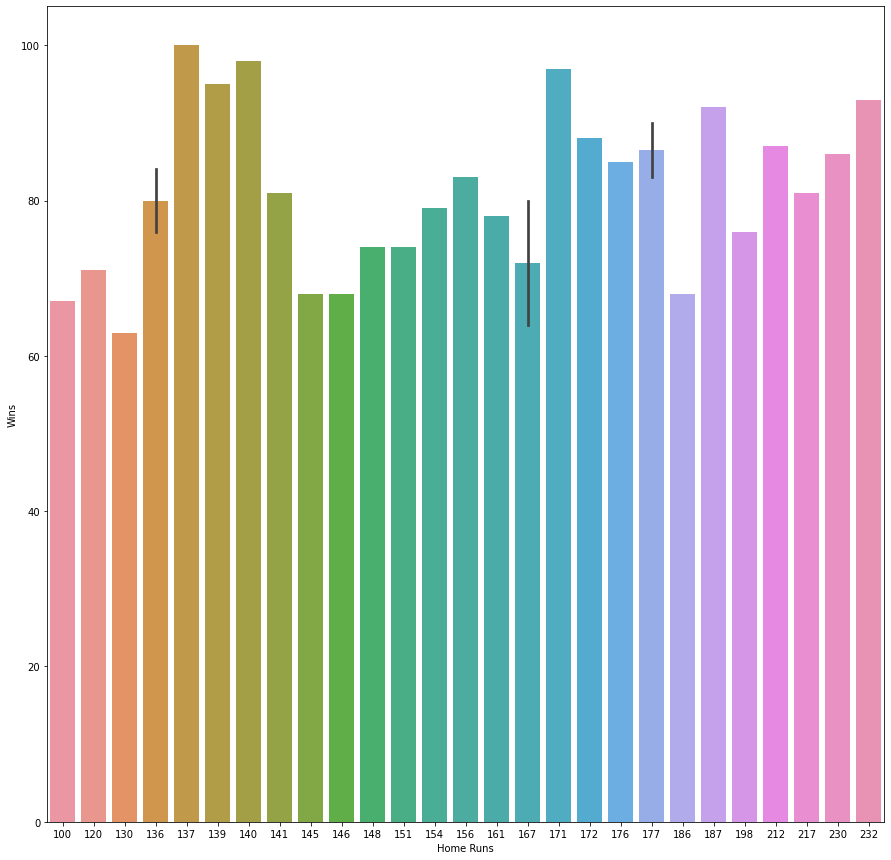

In [27]:
plt.figure(figsize=(15,15))
sns.barplot(x="Home Runs", y="Wins", data=df)
plt.show()

Feature "Home Runs" and it's unique values have no visible pattern when it comes to relating with our label "Wins"

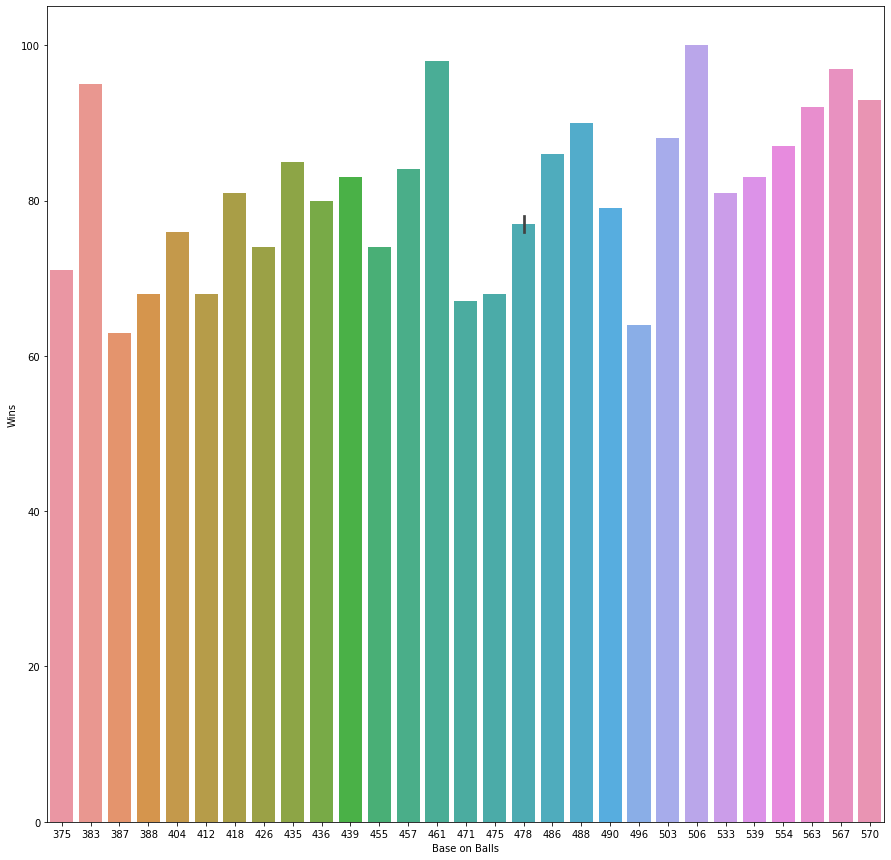

In [28]:
plt.figure(figsize=(15,15))
sns.barplot(x="Base on Balls", y="Wins", data=df)
plt.show()

Feature "Base on Balls" and it's unique values are also distributed unevenly when it comes to relating with our label "Wins"

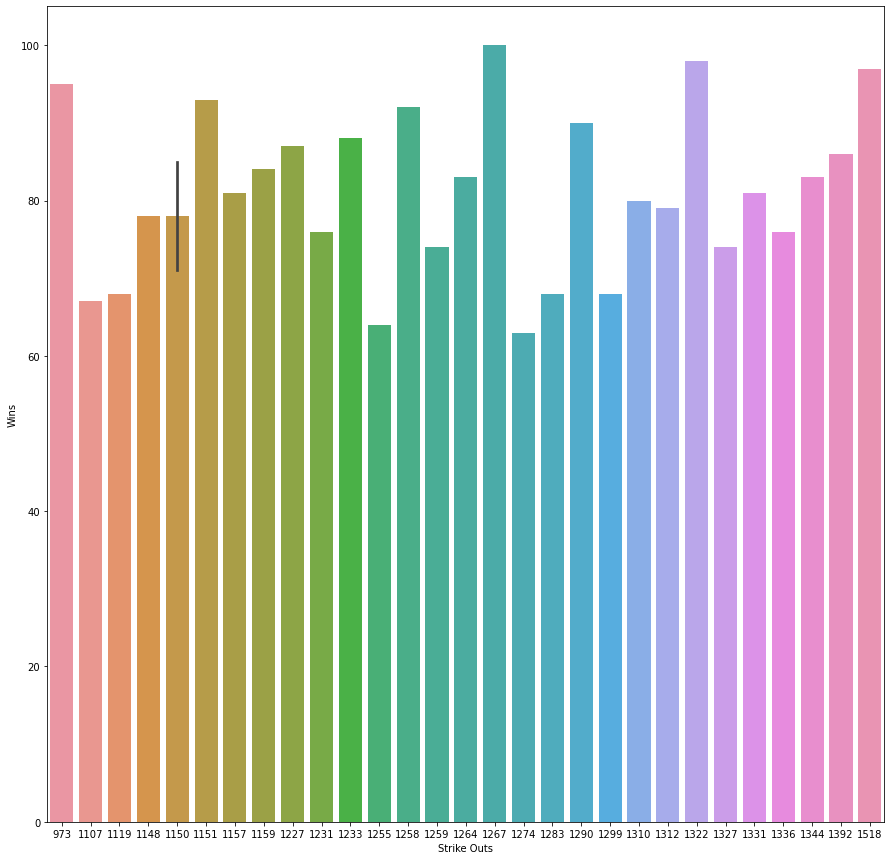

In [29]:
plt.figure(figsize=(15,15))
sns.barplot(x="Strike Outs", y="Wins", data=df)
plt.show()

Feature "Strike Outs" and it's unique values are unevenly patterned when it comes to relating with our label "Wins"

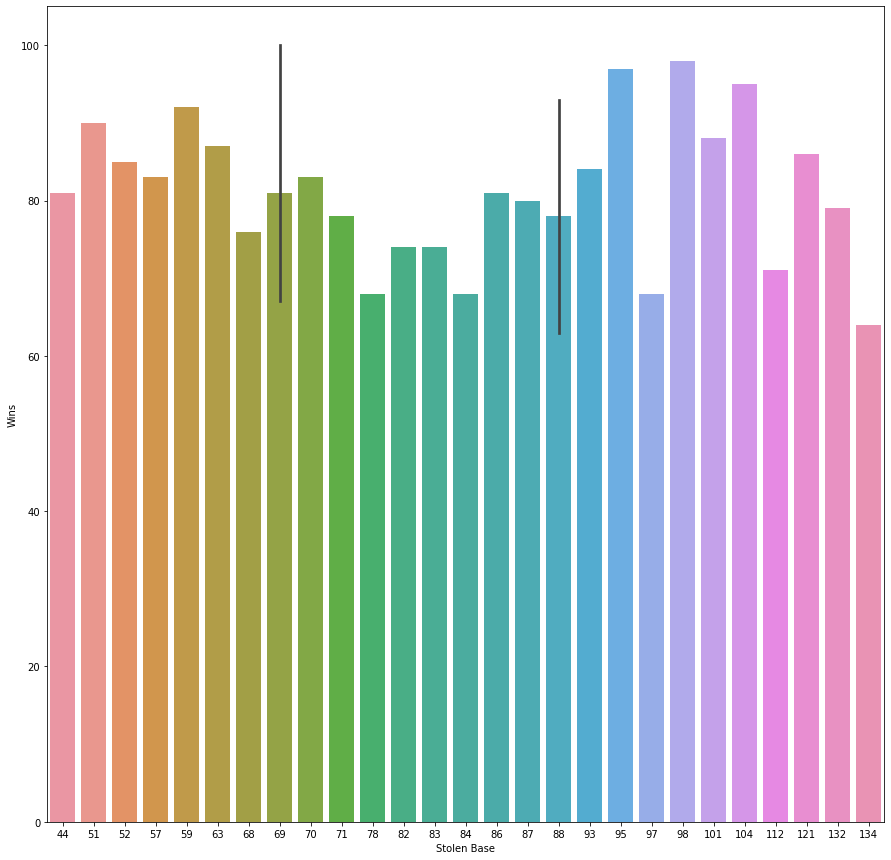

In [30]:
plt.figure(figsize=(15,15))
sns.barplot(x="Stolen Base", y="Wins", data=df)
plt.show()

Feature "Stolen Base" and it's unique values are also distributed unevenly when it comes to relating with our label "Wins"

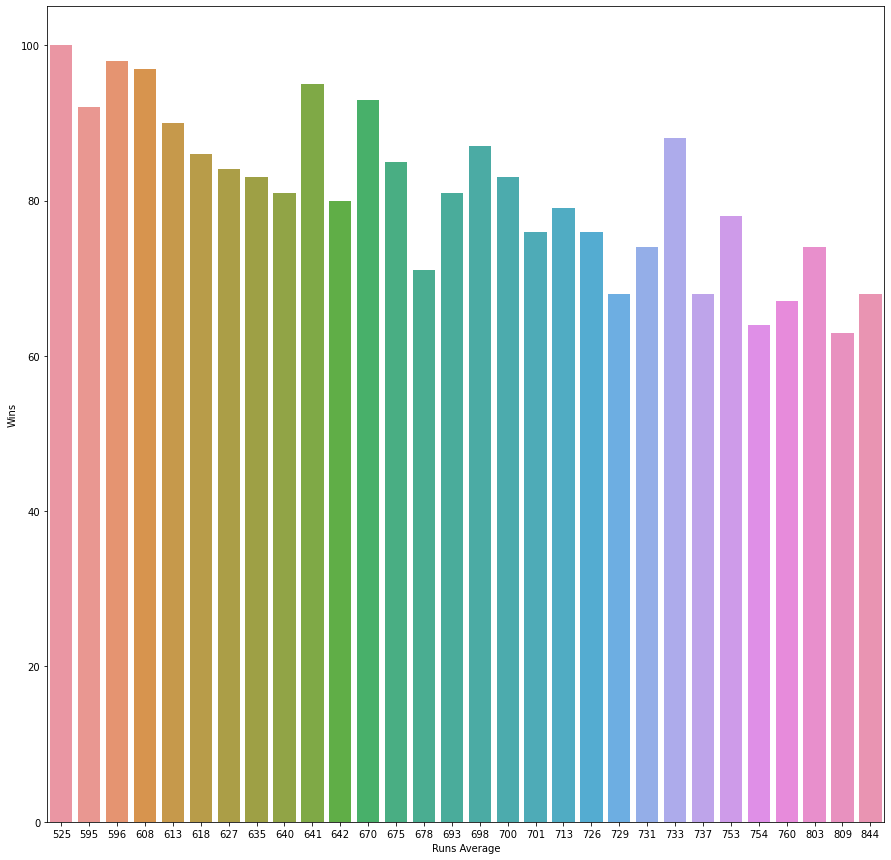

In [31]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Average", y="Wins", data=df)
plt.show()

Feature "Runs Average" and it's unique values show a decreasing pattern when it comes to relating with our label "Wins"

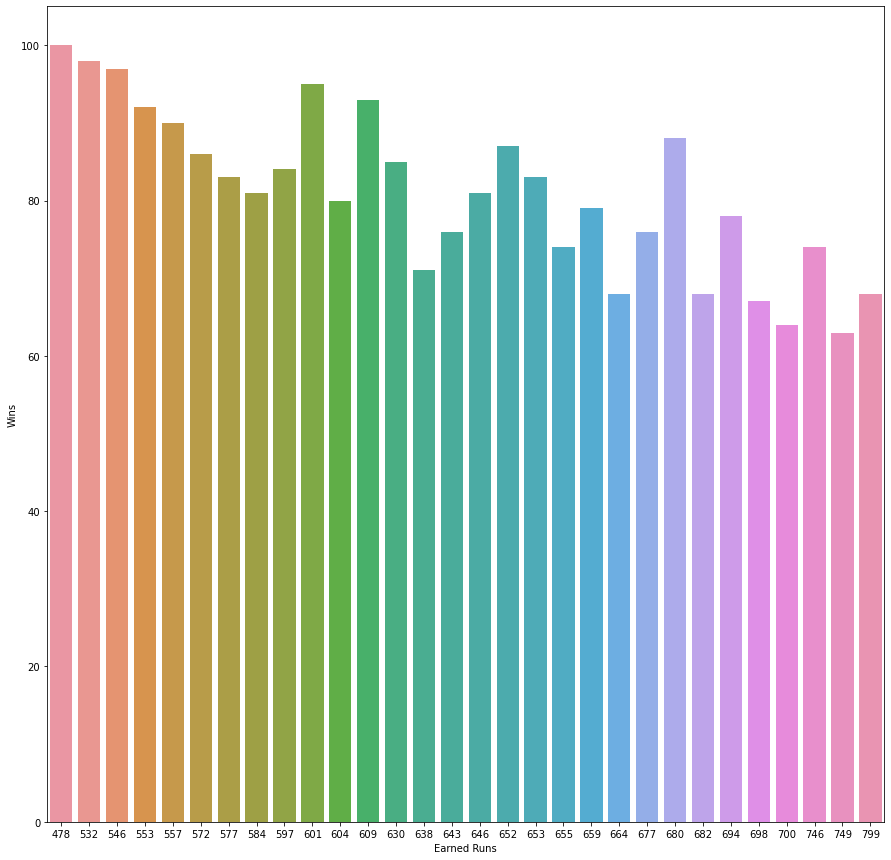

In [32]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Runs", y="Wins", data=df)
plt.show()

Feature "Earned Runs" and it's unique values also show a decreasing pattern when it comes to relating with our label "Wins"

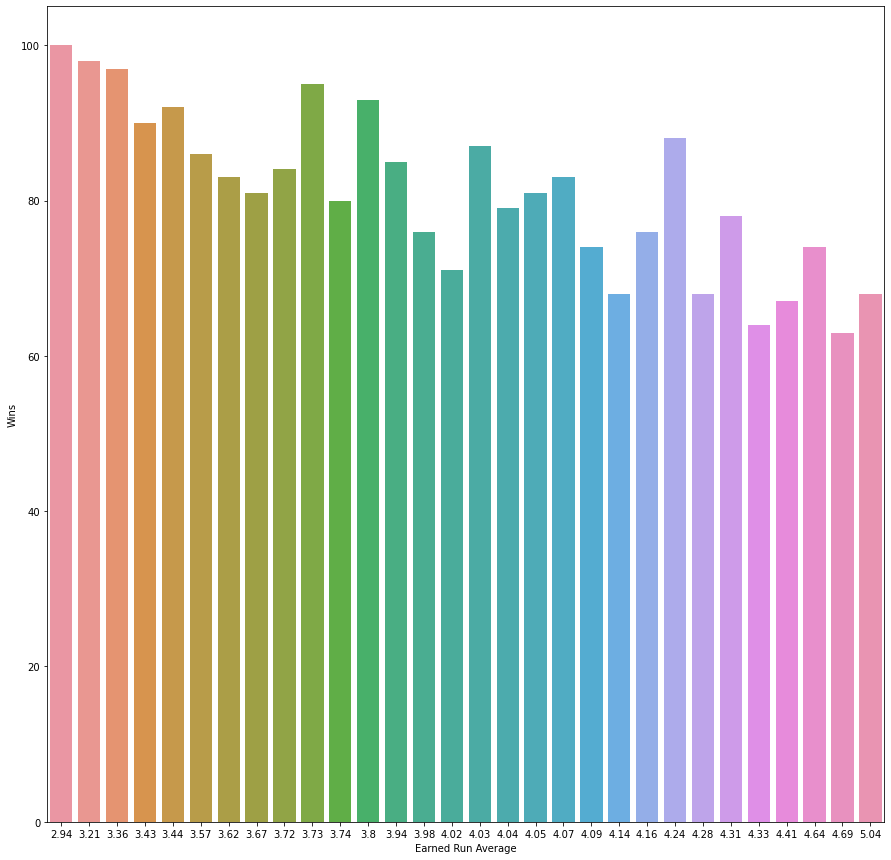

In [33]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Run Average", y="Wins", data=df)
plt.show()

Feature "Earned Run Average" and it's unique values are distributed in a slight decreasing order when it comes to relating with our label "Wins"

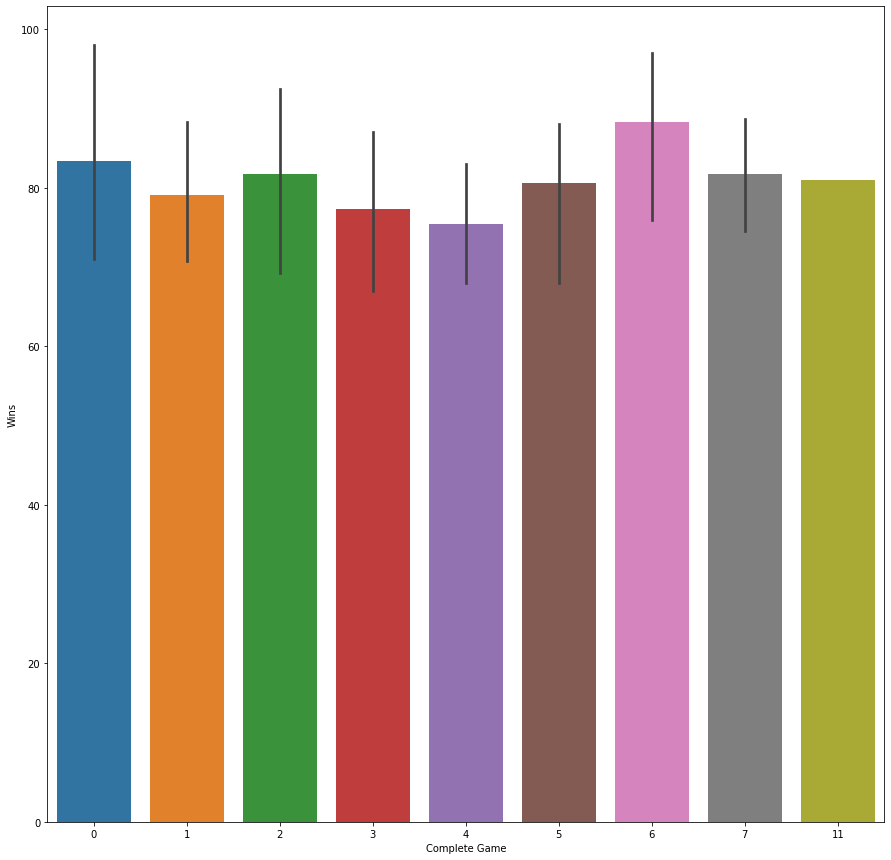

In [34]:
plt.figure(figsize=(15,15))
sns.barplot(x="Complete Game", y="Wins", data=df)
plt.show()

Feature "Complete Game" and it's unique values do not show any pattern when it comes to relating with our label "Wins"

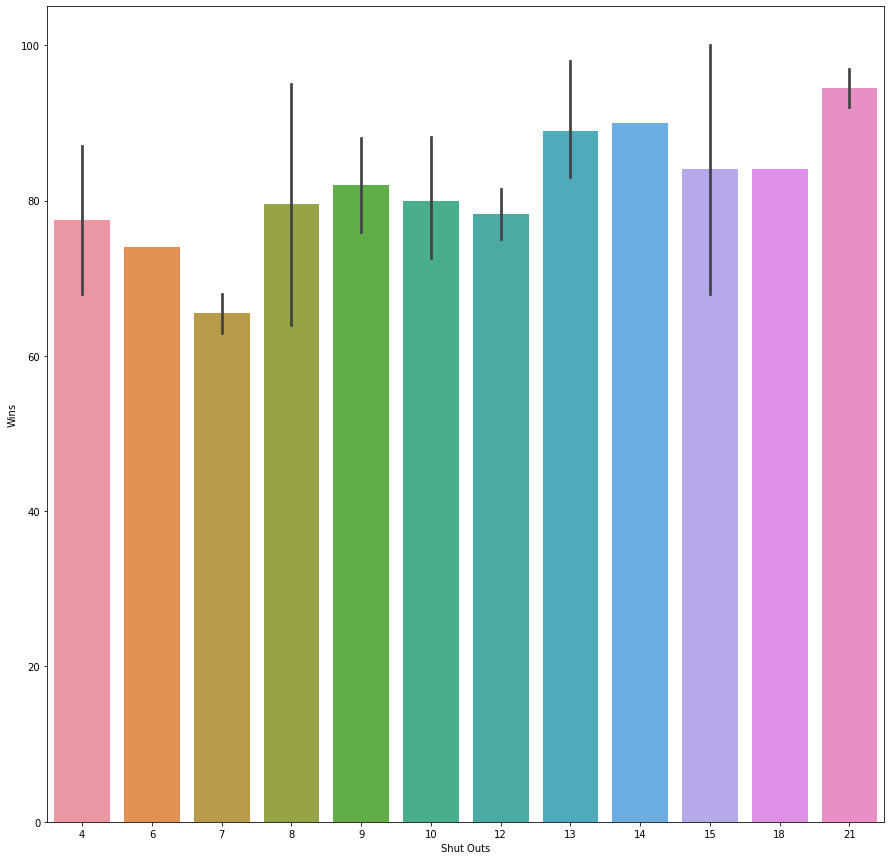

In [35]:
plt.figure(figsize=(15,15))
sns.barplot(x="Shut Outs", y="Wins", data=df)
plt.show()

Feature "Shut Outs" and it's unique values are also distributed unevenly when it comes to relating with our label "Wins"

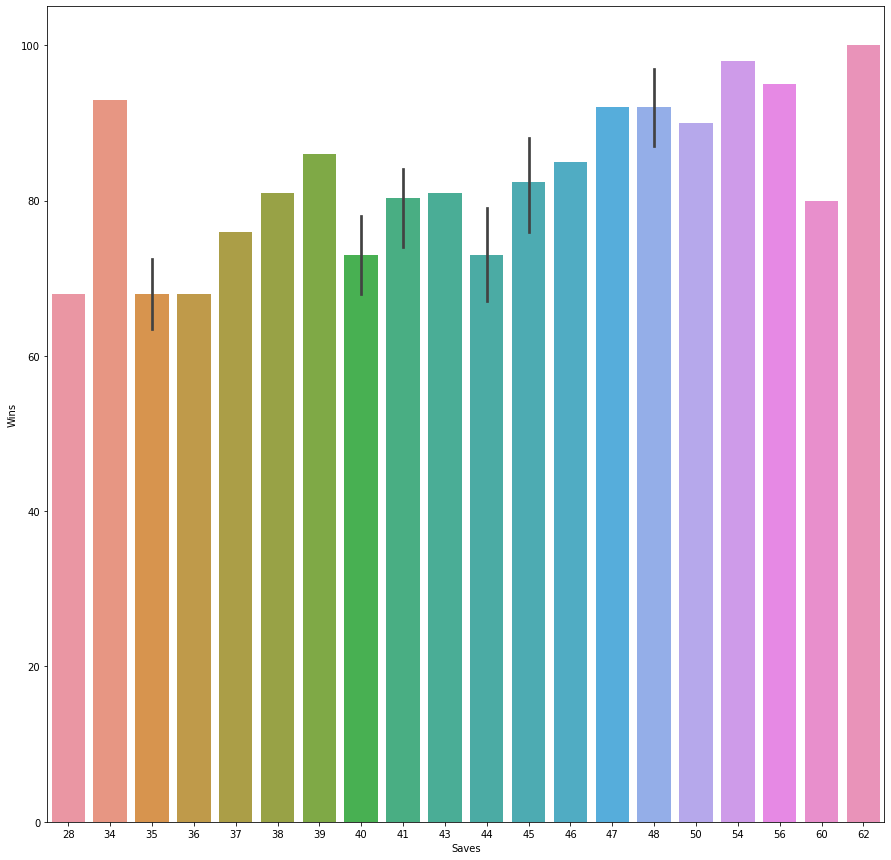

In [36]:
plt.figure(figsize=(15,15))
sns.barplot(x="Saves", y="Wins", data=df)
plt.show()

Feature "Saves" and it's unique values show a slightly increasig pattern when it comes to relating with our label "Wins"

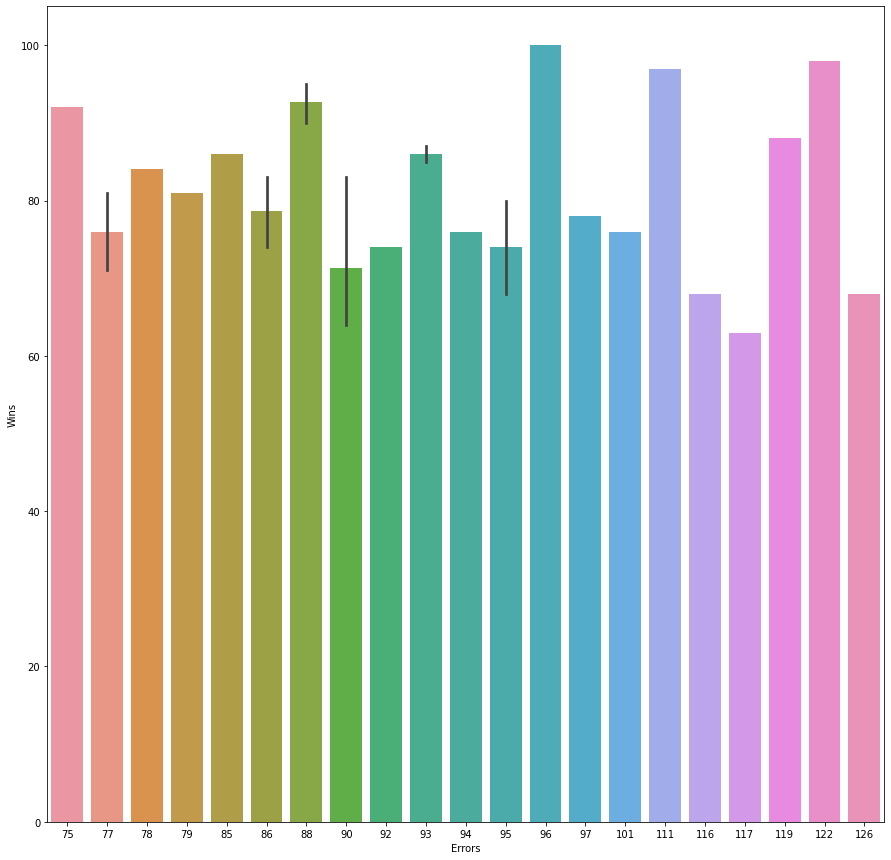

In [37]:
plt.figure(figsize=(15,15))
sns.barplot(x="Errors", y="Wins", data=df)
plt.show()

Feature "Errors" and it's unique values are again distributed unevenly when it comes to relating with our label "Wins"

3)Joint Plot

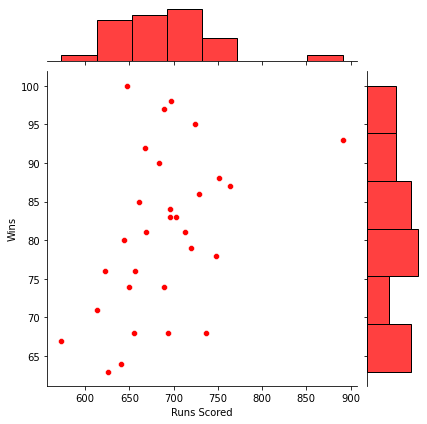

In [38]:
sns.jointplot(x="Runs Scored", y="Wins", data=df, color="red")

We can say by this plot, as runs are getting higher the chances of winning becomes higher

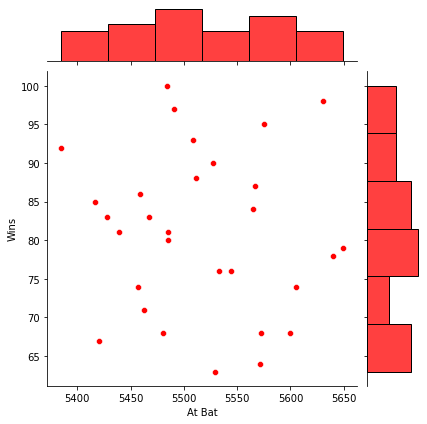

In [39]:
sns.jointplot(x="At Bat", y="Wins", data=df, color="red")

There is no significant relationship displayed between the label Wins and the feature At Bat and the data points are all over the place

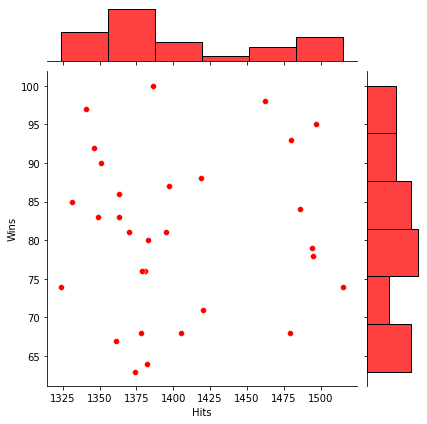

In [40]:
sns.jointplot(x="Hits", y="Wins", data=df, color="red")

Even here we can't say there is any linear relation with our target variable and the data points are scattered too

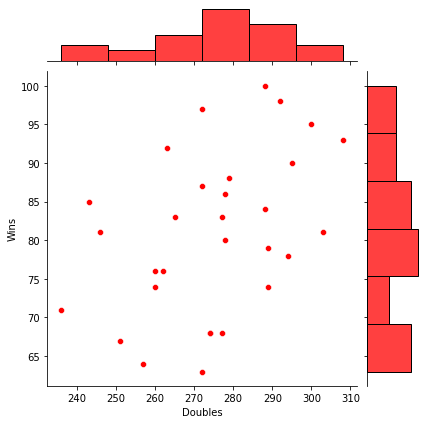

In [41]:
sns.jointplot(x="Doubles", y="Wins", data=df, color="red")

We see that if number of doubles are under 250 the chances of win is below 85 and if the number of doubles more than 280 then the chance of wins is more than 85

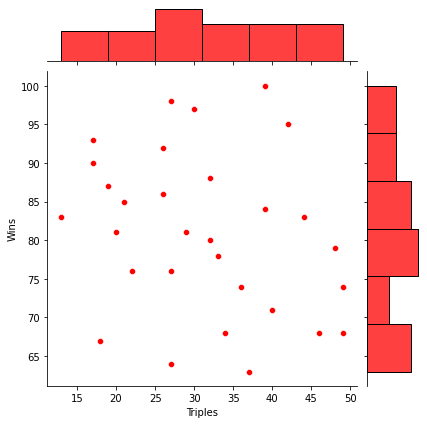

In [42]:
sns.jointplot(x="Triples", y="Wins", data=df, color="red")

For some reason the data points are scattered showing no relation with the label much and therefore we can say number of triples feature are not much correlated with label wins

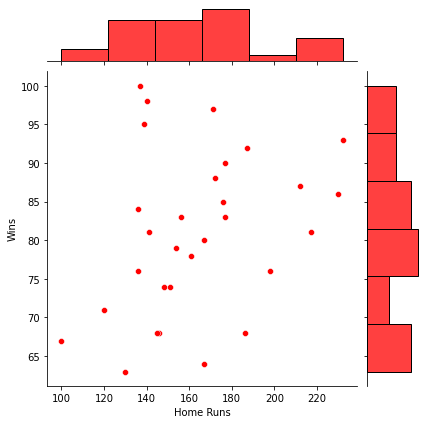

In [43]:
sns.jointplot(x="Home Runs", y="Wins", data=df, color="red")

By looking at this plot we can say if the number of homeruns is below 140, the chances of wins becoms less

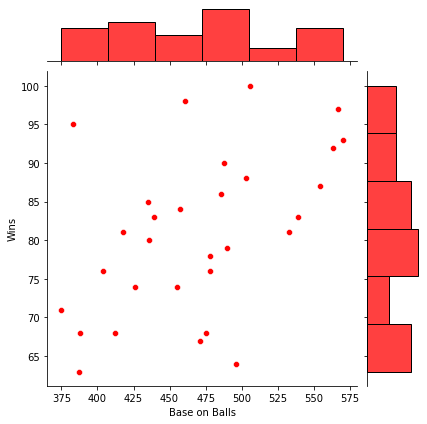

In [44]:
sns.jointplot(x="Base on Balls", y="Wins", data=df, color="red")

In case the base on balls number is above 525 then number of wins are more than 80 But still there is not much relation is observed between this feature and the label variables

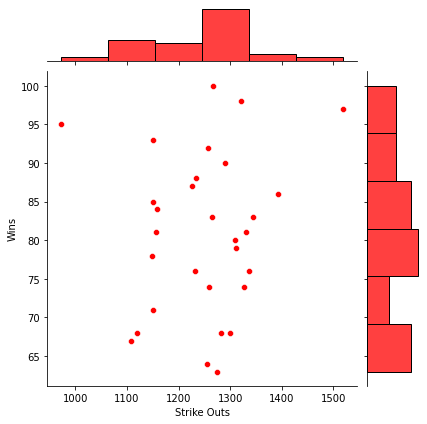

In [45]:
sns.jointplot(x="Strike Outs", y="Wins", data=df, color="red")

In this feature plot it is not showing any linear relation with number of wins

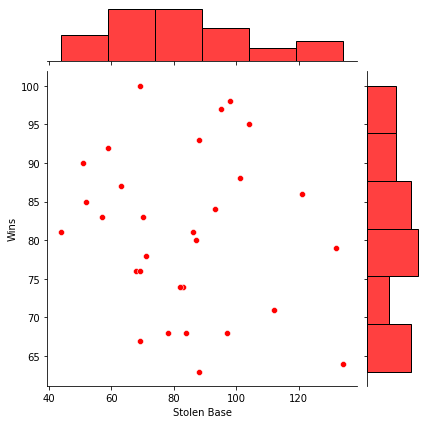

In [46]:
sns.jointplot(x="Stolen Base", y="Wins", data=df, color="red")

A stolen base happens when a base runner proceeds by capturing a base to which they are not entitled to and here if stolen base is between 40 to 60 the number of wins are above 80

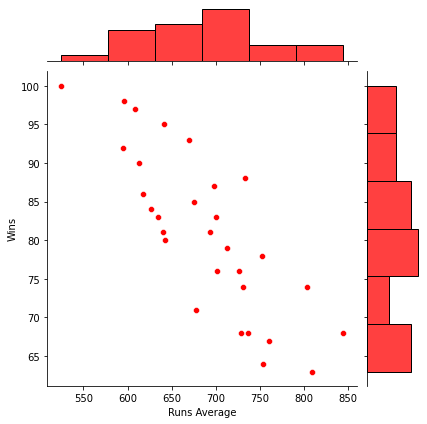

In [47]:
sns.jointplot(x="Runs Average", y="Wins", data=df, color="red")

By observing the above plot we can say that Runs Average are negatively related to number of wins, that is because as the Runs Average number increases the win possibility decreases

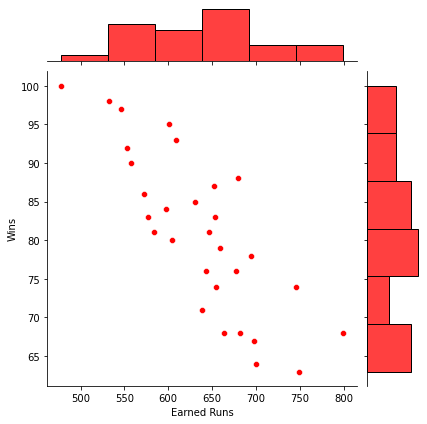

In [48]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="red")

Just like the Runs Average number, Earned Runs also negatively impacts to number of wins

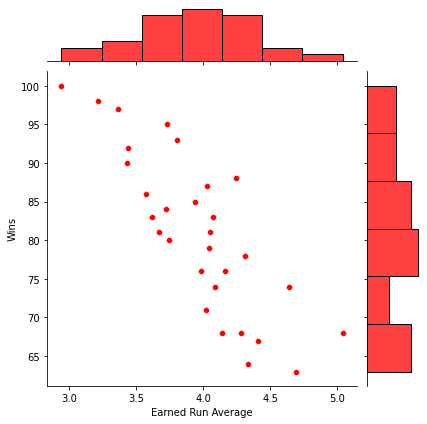

In [49]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="red")

Earned Runs Average is negatively related to number of wins and is completely depends on feature Earned Runs

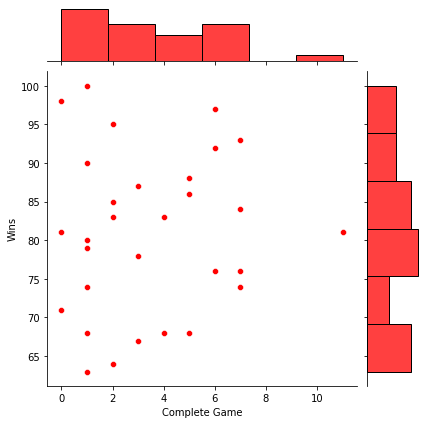

In [50]:
sns.jointplot(x="Complete Game", y="Wins", data=df, color="red")

We can see that as number of complete games goes above 6 then the number of wins is more than 75 and there is an outlying data present too

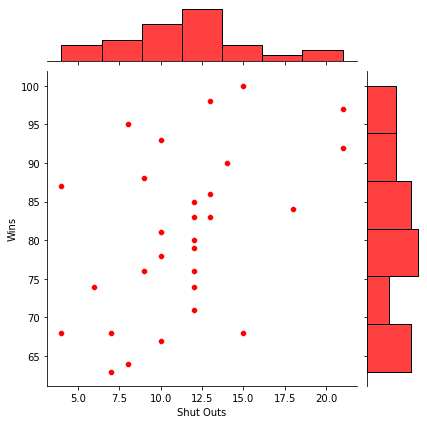

In [51]:
sns.jointplot(x="Shut Outs", y="Wins", data=df, color="red")

A shut out refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run so here as the shout outs rise the wins number increases too

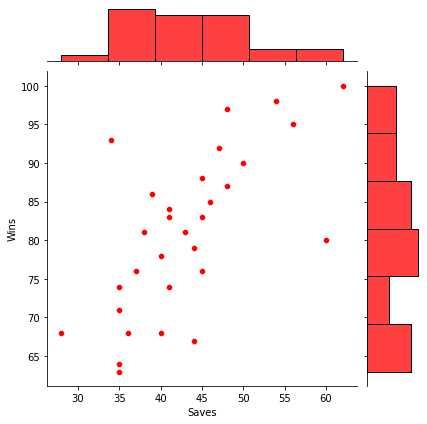

In [52]:
sns.jointplot(x="Saves", y="Wins", data=df, color="red")

A save is rewarded to the relief pitcher who finishes a game for the winning team under certain circumstances so here as the number of save goes higher the number of wins also increases

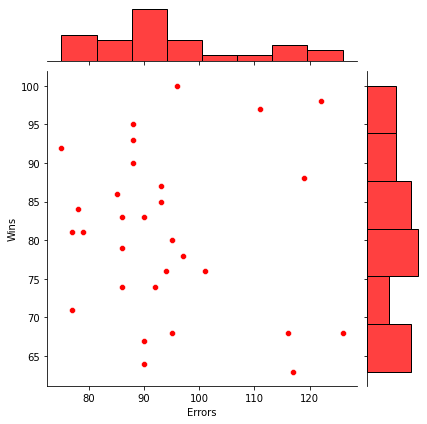

In [53]:
sns.jointplot(x="Errors", y="Wins", data=df, color="red")

In baseball statistics an error is an act in the judgment of the official scorer of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. So here the number of errors are more in the range of 70 to 100 impacting the wins

4)LM Plot

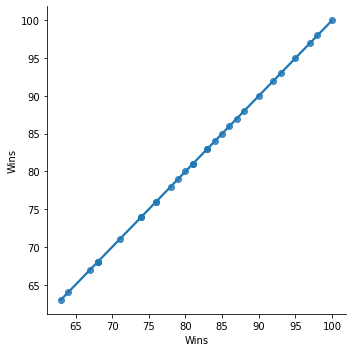

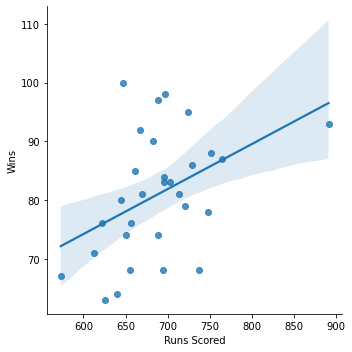

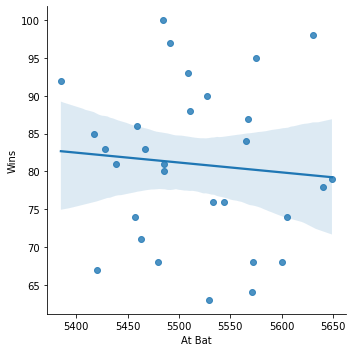

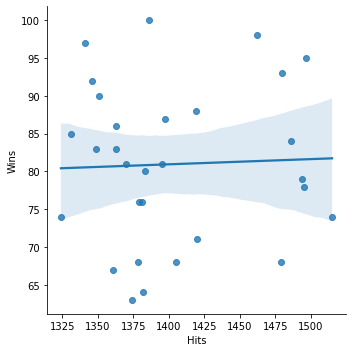

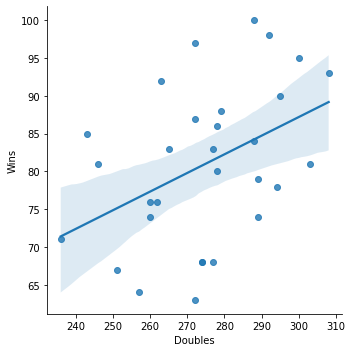

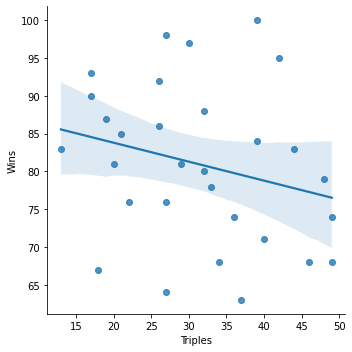

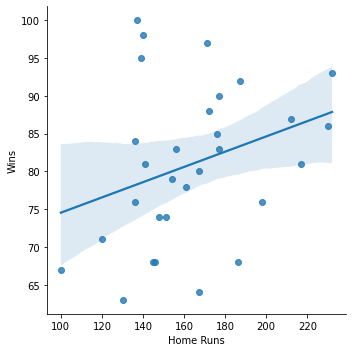

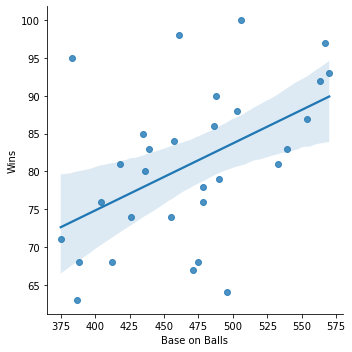

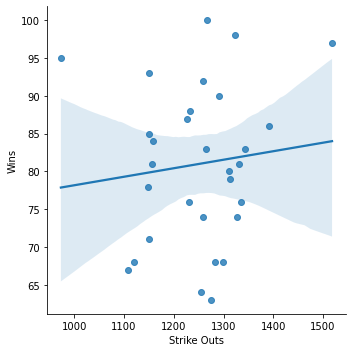

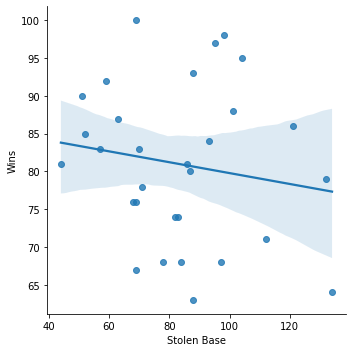

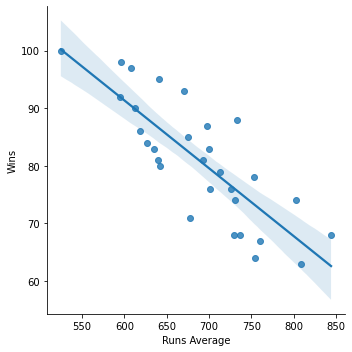

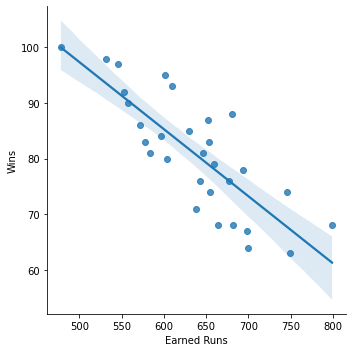

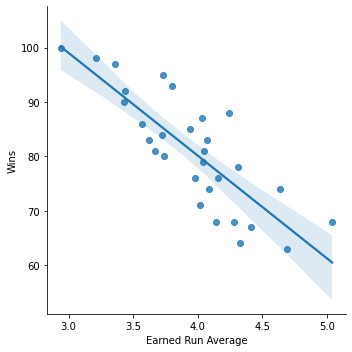

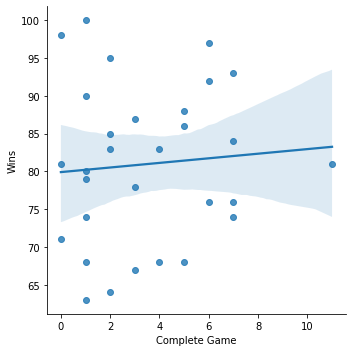

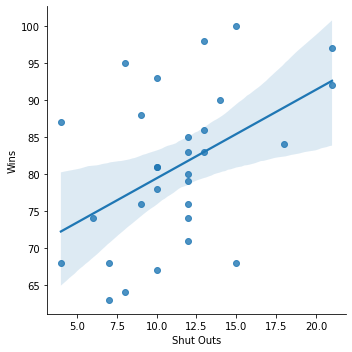

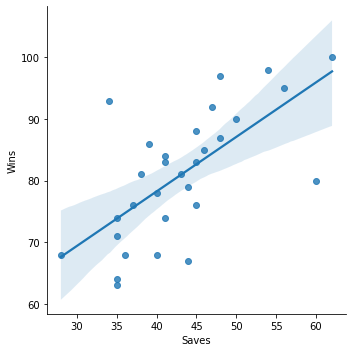

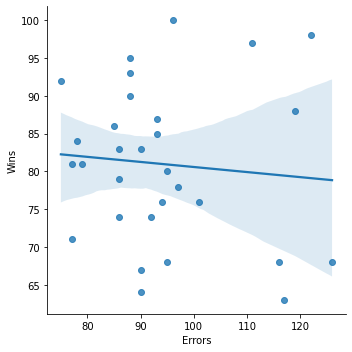

In [54]:
for i in df:
    sns.lmplot(x = i , y ='Wins' , data = df)

From above plot we can see that runs is directly proportional to wins, At Bats is inversely proportional to wins, Hits is not much impacted by Wins, Doubles is proportional to Wins, Triples is again proportional to Wins, Home runs is proportional to Wins, Walks is also proportional to wins, Strike out is proportional to wins, Stolen bases is proportional to Wins, Runs allowed is inversely proportional to Wins, Earned runs is again inversely proportional to Wins, Earned runs average is also inversely proportional to Wins, Wins is somewhat affected by the number of Complete Games, Wins is slightly affected by shut outs and Wins is directly propertional to Saves.

# Multivariate Analysis

1)Pair Plot

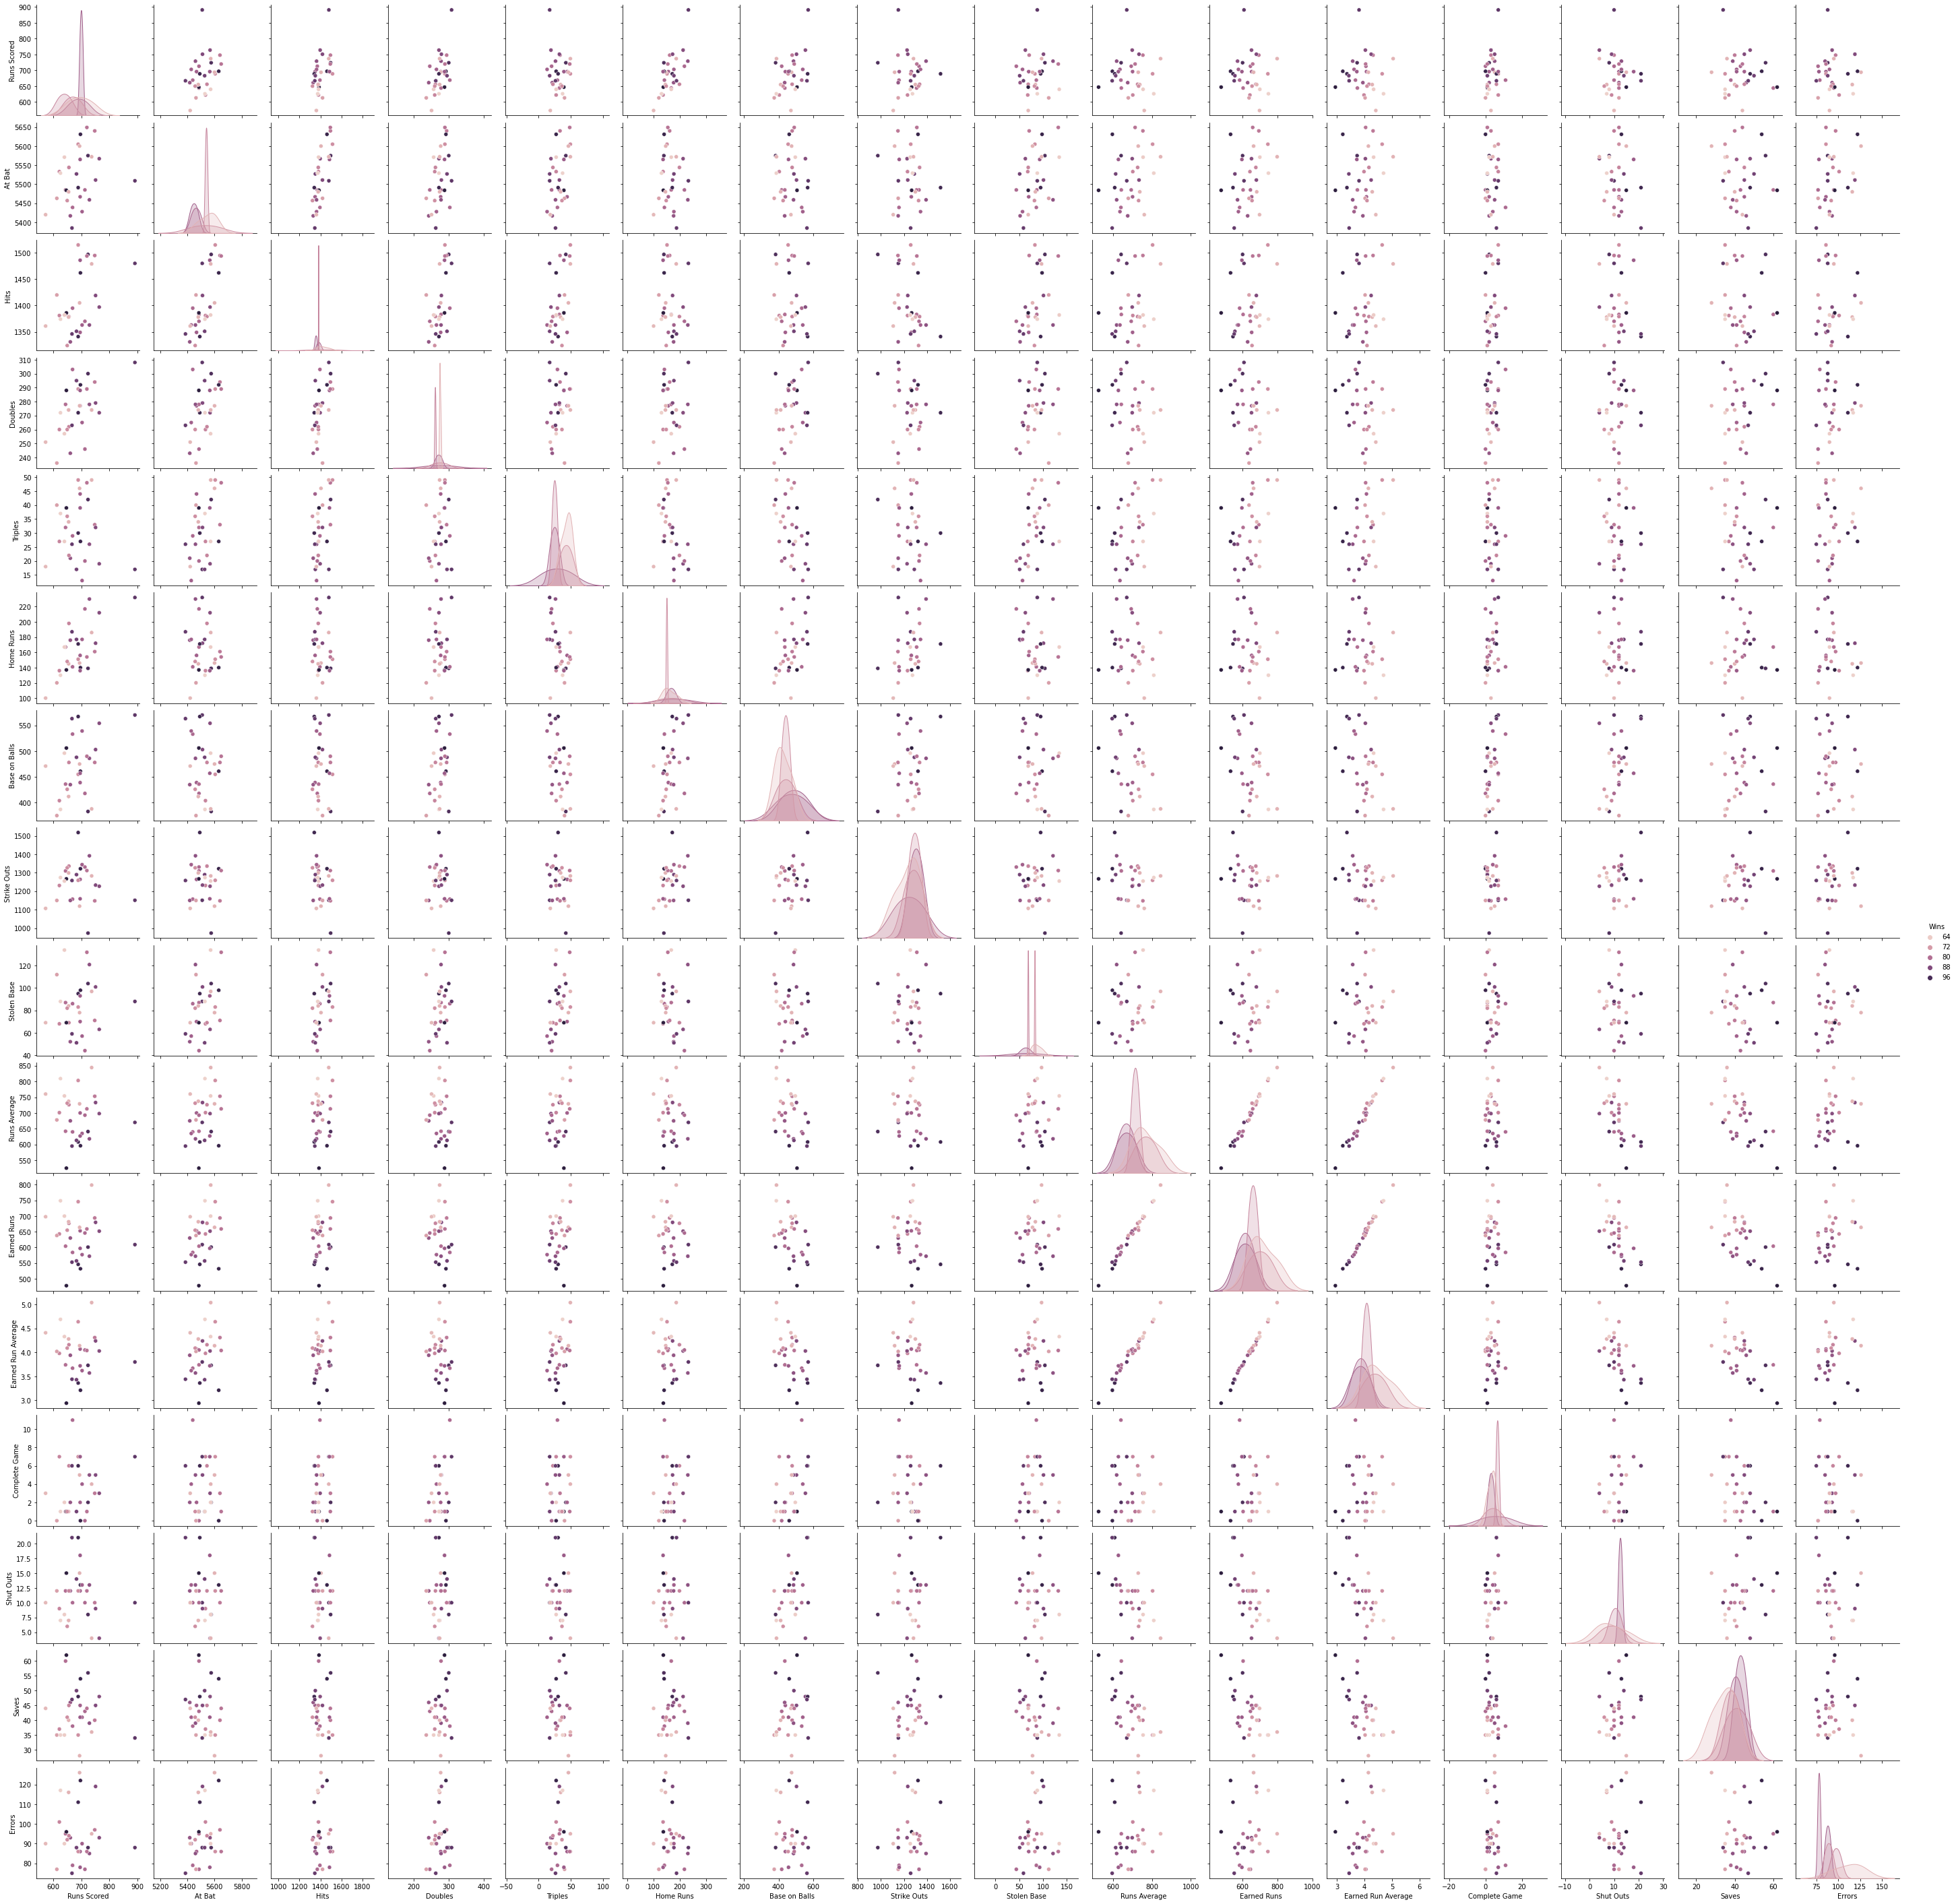

In [55]:
sns.pairplot(df, hue="Wins")

Since there are 17 columns present in our dataset making a pairplot for all of them has given us a very tiny image with an unreadable format therefore we will take help of a heatmap to get the collinearity details for the columns in our dataset.

# Correlation using a Heatmap

1)Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2)Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

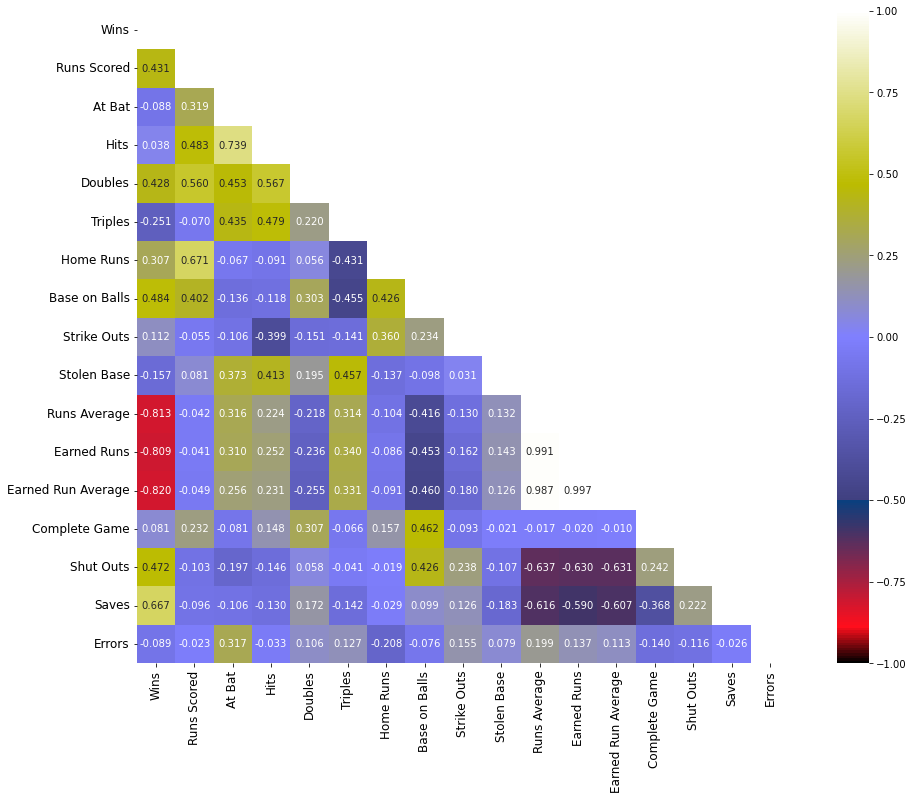

In [56]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In the above heatmap we see that our label "Wins" column is showing negatively correlated with feature columns "Runs Average", "Earned Runs" and "Earned Run Average". Also there is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average" data points. We may need to drop highly correlated columns to avoid this issue or I may try to make use of PCA to reduce the multi collearnig concern ahead before the model building phase.

Box Plot

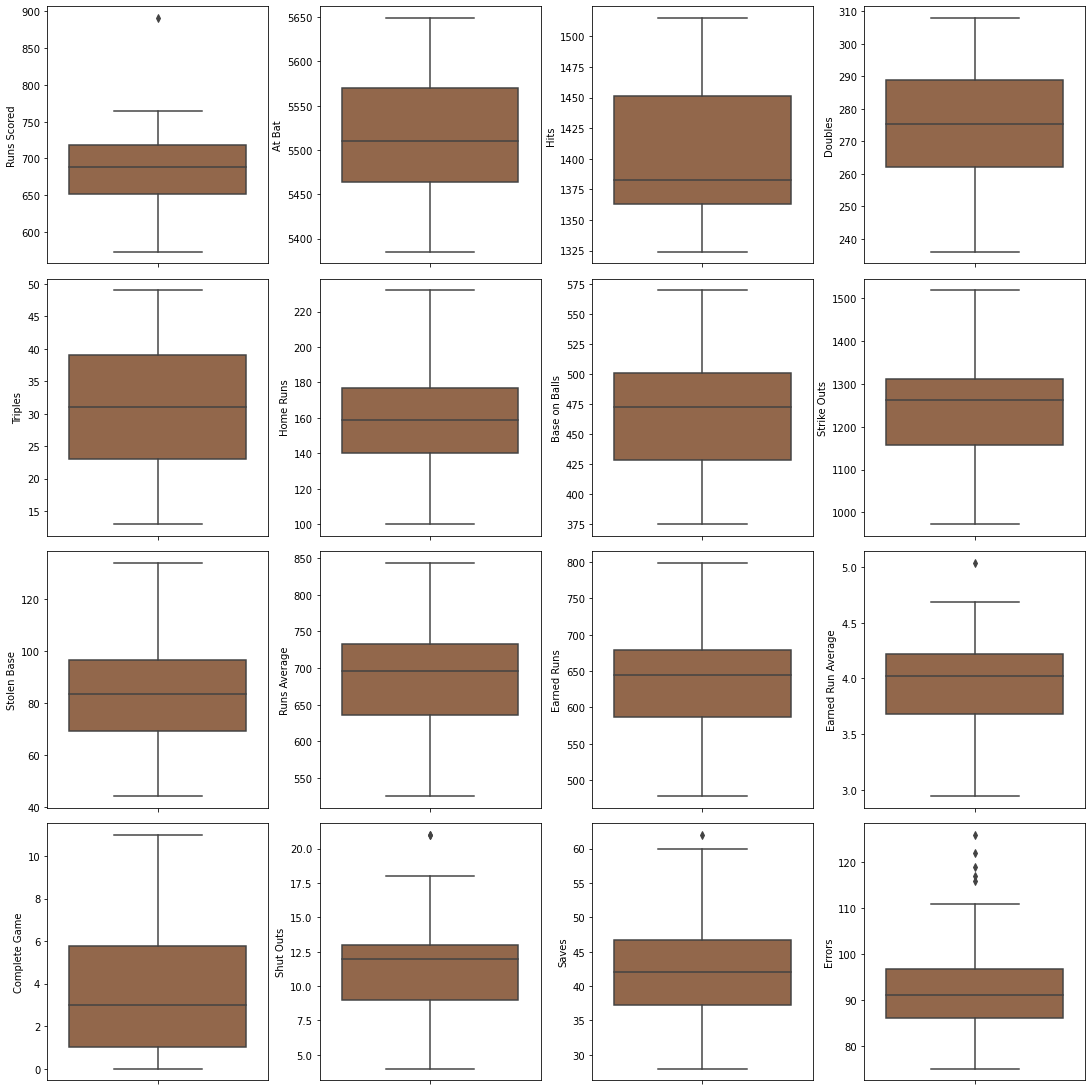

In [57]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="copper")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

There are light traces of outliers still present in our dataset but I think I will not remove any more information from my now updated dataset. Using the existing data to building the machine learning model.

Distribution Plot

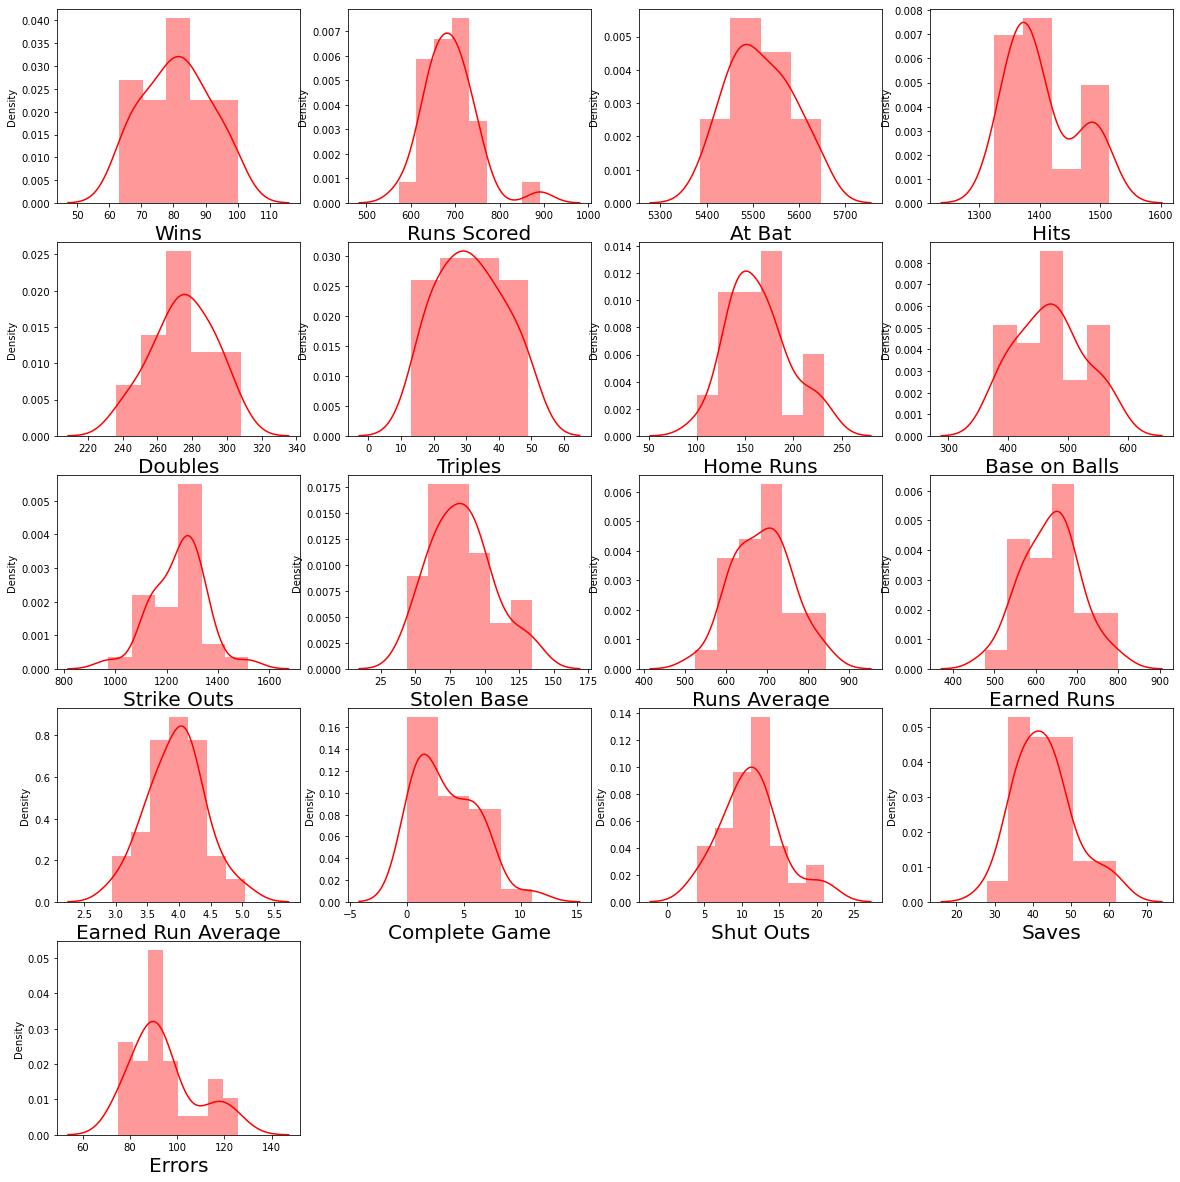

In [58]:
# Checking how the data has been distriubted in each column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above distplots we can observe that most of the columns are normally distributed and some of them have skewness too.

From the distplot we can observe the following

The target column 'W'(wins) looks normally distributed and also we can observe there is no skewness. So from the graph it is clear that the winning rate is between 63 to 100 and mean of W is 80.

The data in the feature 'R'(Runs) is not normal and the median is more than the mean so it is skewed to left.
The run rate lies between 570-890.These differences can also be seen in the columns 'BB'(Walks), 'SO'(strike outs), 'RA'(Runs allowed), 'ERA'(Earned run average), 'SHO'(Shutouts). Eventhough they looks normal but has skewness.

The data in the feature 'AB'(At Bats) looks normally distributed and has no skewnes The value of AB mostly lies between 5300-5650.

The data in the features 'H'(Hits), 'HR'(homeruns),'SV'(saves) and 'E'(errors) are not normal and the mean is more than the median which means skewed to right.

'2B'(doubles) also looks normal and bit skewness present since the median is bit more than mean. The doubles rate is between 230-300.

The mean and the meadian is almost same in the feature columns '3B'(tribles) and 'SB'(Stolen Bases) the data is normally distributed and there is no skewness.Also the column 'CG'(complete games) is looks almost normal and has no skewness.

The column 'ER'(Earned Runs) is normal and has no skewness.

# Removing outliers

# 1.Zscore method

In [59]:
df.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

In [60]:
# Features containing outliers
features = df[["Runs Scored","Earned Run Average","Shut Outs","Saves","Errors"]]

In [61]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Runs Scored,Earned Run Average,Shut Outs,Saves,Errors
0,0.619078,0.506955,0.814629,1.671607,0.461470
1,0.134432,0.254598,0.172800,0.249879,0.607197
2,0.332906,0.641347,0.320914,0.654856,1.117242
3,1.146419,0.053010,0.567771,0.784104,0.485758
4,0.013270,1.531318,0.172800,1.042600,0.607197
5,3.509647,0.350165,0.320914,1.171848,0.461470
6,1.311430,0.165003,1.802057,0.637623,0.097152
7,0.428681,0.209800,0.320914,0.008617,1.262970
8,0.765626,0.484557,0.172800,2.188598,0.048576
9,1.034489,0.792164,0.320914,0.396360,0.194303


Now we have removed the outliers.

In [62]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


This is the new dataframe after removing the outliers.

In [63]:
df.shape

(30, 17)

In [64]:
new_df.shape

(29, 17)

The new dataset contains 29 rows and 17 columns. Its looks like there is no more data loss. Let's check the dataloss.

In [65]:
# Checking the the data loss
data_loss = (30-29)/30*100
data_loss

3.3333333333333335

Here I am not losing more data so I am removing outliers.

Let's remove the outliers and check data loss using IQR method.

# 2. IQR (Inter Quantile Range) method

In [66]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [67]:
df1.shape

(20, 17)

The new dataframe using IQR method has 20 rows and 17 columns.

In [68]:
# Let's check the dataloss
data_loss = (30-20)/30*100
data_loss

33.33333333333333

Using IQR method I am losing more data. So let's consider Zscore method only.

# Checking for skewness

In [71]:
new_df.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

The skewness present in the columns "Hits", "Complete Game", "Shut Outs", "Saves" and "Errors". Will remove this now.

# Removing Skewness using yeo-johnson method

In [72]:
skewed_features = ["Complete Game","Shut Outs", "Saves", "Errors"]

In [73]:
# Using yeo-johnson method to remove the skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [74]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,Complete Game,Shut Outs,Saves,Errors
0,-0.307098,-0.787002,1.532753,-0.348265
1,-0.307098,0.236737,0.312020,-0.540820
2,2.011315,-0.252844,-0.664137,-1.326125
3,1.264463,-0.513555,-0.820689,0.650818
4,1.264463,0.236737,-1.149165,-0.540820


In [75]:
new_df['Hits'] = np.log(new_df['Hits'])

In [76]:
# Now let's check the skewness after using the transformation
new_df.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.738423
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs             0.000529
Saves                -0.000925
Errors                0.065585
dtype: float64

Now the skewness has been removed. Let's visualize it.

I have used all the methods to remove the skewness in the column"H" but the skewness is not reducing in this column. After using yeo-johnson method I am getting zero values in the column "H" and showing NAN values while I plot the heat map. It is because the feature "H" might have some relation with the target and will remove this column if necessary in further steps.

Distribution Plot

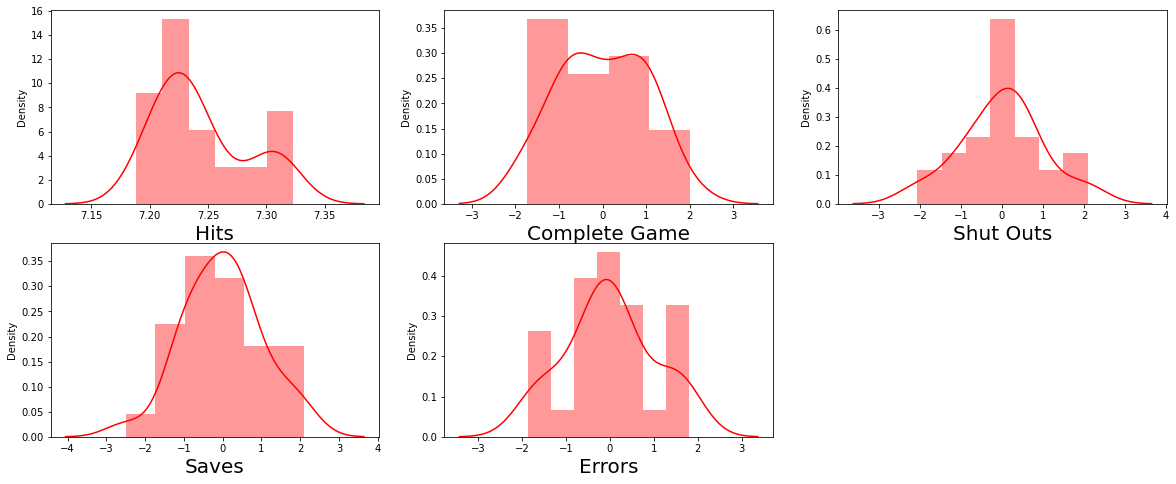

In [77]:
# After removing let's check how the data has been distributed in each column.
features_skewed = ["Hits","Complete Game","Shut Outs", "Saves", "Errors"]
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[features_skewed]:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see the data is normally distributed and skewness is also removed. I used all the possible methods to remove the skewness but the column "H" still has skewness. First will check the correlation with the target, if there is necessary will drop this column.

# Correlation between the target variable and independent variables using HEAT map

In [78]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.020787,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.007696,0.481626,0.756713,-0.079633
Runs Scored,0.390451,1.000000,0.438022,0.432235,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.155122,-0.113640,0.083261,0.039865
At Bat,-0.085780,0.438022,1.000000,0.770155,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.059648,-0.194219,-0.147964,0.332002
Hits,-0.020787,0.432235,0.770155,1.000000,0.527354,0.579733,-0.219201,-0.221773,-0.373302,0.420201,0.243639,0.279955,0.255885,0.071667,-0.129966,-0.103112,-0.020046
Doubles,0.384886,0.469293,0.490752,0.527354,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.227220,0.088226,0.241326,0.152541
Triples,-0.206737,0.134204,0.445604,0.579733,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.004496,-0.066384,-0.269255,0.080498
Home Runs,0.245697,0.586894,-0.064653,-0.219201,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.118284,-0.024448,0.106523,-0.165883
Base on Balls,0.447513,0.258450,-0.137850,-0.221773,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.445335,0.441043,0.207948,-0.056106
Strike Outs,0.156469,0.081158,-0.111243,-0.373302,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.063129,0.204704,0.125572,0.164817
Stolen Base,-0.169503,0.075323,0.373674,0.420201,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.040524,-0.100054,-0.195772,0.070527


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

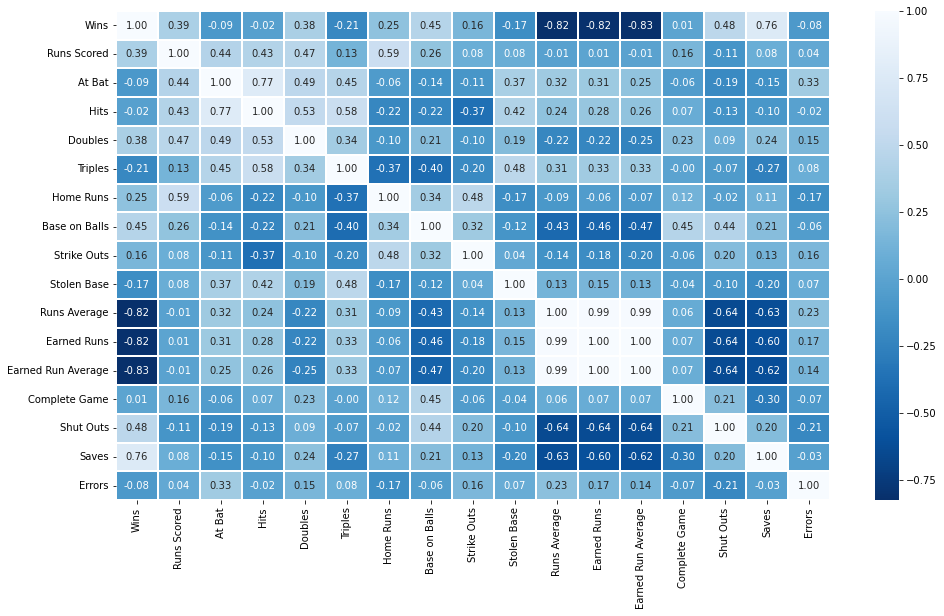

In [79]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.2f', cmap="Blues_r", annot = True)
plt.yticks(rotation=0);

This heat map contains both positive and negative correlation.

The target "W" is positively correlated with the features "SV", "SHO", "BB", "HR", "2B", "R" and "SO" .

The target "W" is highly negatively correlated with the features "ERA","ER" and "RA".

The label "W" is also negatively correlated with the features "E", "SB", "3B" and "AB".

Apart from this label and feature relation we can also infer that the features "ERA", "ER" and "RA" are highly positively correlated with each other. Which causes multicollinearity problem, to avoid this problem will check VIF value and will drop the columns if necessary.

The column "Hits" and "Complete Game" has no correlation with the label, we can drop these columns.

In [80]:
cor['Wins'].sort_values(ascending=False)

Wins                  1.000000
Saves                 0.756713
Shut Outs             0.481626
Base on Balls         0.447513
Runs Scored           0.390451
Doubles               0.384886
Home Runs             0.245697
Strike Outs           0.156469
Complete Game         0.007696
Hits                 -0.020787
Errors               -0.079633
At Bat               -0.085780
Stolen Base          -0.169503
Triples              -0.206737
Earned Runs          -0.815308
Runs Average         -0.823176
Earned Run Average   -0.826952
Name: Wins, dtype: float64

positively correlated: Saves", "Shut Outs", "Base on Balls", "Runs Scored", "Doubles", "Home Runs", "Strike Outs", "Complete Game", 
    
Negatively correlated: "Hits", "Errors" , "At Bat", "Stolen Base" , "Triples" ,"Earned Runs", "Runs Average", "Earned Run Average"

# Visualizing the correlation between label and features using bar plot

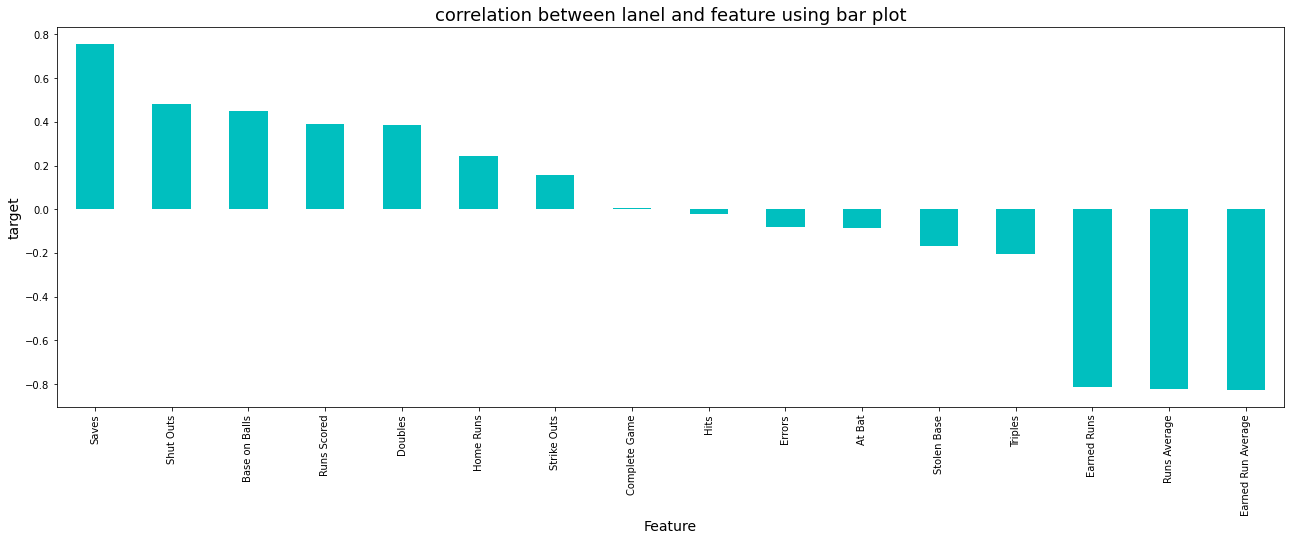

In [81]:
plt.figure(figsize=(22,7))
new_df.corr()['Wins'].sort_values(ascending=False).drop(['Wins']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

Now we can easily analyse the data, here the feature "Hits" and "Complete Game" has very less correaltion with the label. Let's drop them.

In [82]:
new_df.drop("Hits", axis=1, inplace=True)

In [83]:
new_df.drop("Complete Game", axis=1, inplace=True)

In [84]:
new_df.head()

,Wins,Runs Scored,At Bat,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Shut Outs,Saves,Errors
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,-0.787002,1.532753,-0.348265
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,0.236737,0.312020,-0.540820
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,-0.252844,-0.664137,-1.326125
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,-0.513555,-0.820689,0.650818
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,0.236737,-1.149165,-0.540820


This is the dataframe after removing the irrelevant columns.

# Data Preprocessing

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [85]:
x = new_df.drop("Wins", axis=1)
y = new_df["Wins"]

In [86]:
x.shape

(29, 14)

In [87]:
y.shape

(29,)

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column

In [88]:
x.head()

,Runs Scored,At Bat,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Shut Outs,Saves,Errors
0,724,5575,300,42,139,383,973,104,641,601,3.73,-0.787002,1.532753,-0.348265
1,696,5467,277,44,156,439,1264,70,700,653,4.07,0.236737,0.312020,-0.540820
2,669,5439,303,29,141,533,1157,86,640,584,3.67,-0.252844,-0.664137,-1.326125
3,622,5533,260,27,136,404,1231,68,701,643,3.98,-0.513555,-0.820689,0.650818
4,689,5605,289,49,151,455,1259,83,803,746,4.64,0.236737,-1.149165,-0.540820


# Feature Scaling

In [89]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Runs Scored,At Bat,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Checking VIF values to solve multicollinearity

In [90]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,6.219825,Runs Scored
1,9.828077,At Bat
2,2.683572,Doubles
3,3.196853,Triples
4,7.369072,Home Runs
5,2.686472,Base on Balls
6,2.741072,Strike Outs
7,1.757901,Stolen Base
8,179.096825,Runs Average
9,1754.643859,Earned Runs


The VIF value is more than 10 in the columns "At Bat", "Runs Average", "Earned Runs", "Earned Run Average". Let's drop these one by one. First drop the colummn having highest VIF value that is "ER".

In [91]:
x.drop("Earned Runs", axis=1, inplace=True)

In [92]:
# Againing checking the VIF after removing one column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.352902,Runs Scored
1,3.177214,At Bat
2,2.597985,Doubles
3,3.072775,Triples
4,4.949255,Home Runs
5,2.561982,Base on Balls
6,2.661842,Strike Outs
7,1.680467,Stolen Base
8,119.939744,Runs Average
9,111.859162,Earned Run Average


Now we can see the multicollinearity still exists, so let me drop the column "Runs Average".

In [93]:
x.drop("Runs Average", axis=1, inplace=True)

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.250076,Runs Scored
1,2.238746,At Bat
2,2.597917,Doubles
3,3.030073,Triples
4,4.562014,Home Runs
5,2.222720,Base on Balls
6,2.042786,Strike Outs
7,1.568151,Stolen Base
8,3.878177,Earned Run Average
9,2.651314,Shut Outs


Now we can observe all the values are less than 10 which means we have solved the multicollinearity problem. let's move to model building.

In [95]:
# Dataset after preprocessing 
x.head()

,Runs Scored,At Bat,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Earned Run Average,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,0.236737,-1.149165,-0.540820


# Modeling

# Finding best random state for building Regression Models

In [96]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9291790579976077  on Random_state  50


I am getting the maximum R2 score as 92.92% on the random state 50.

# Creating the training and testing data sets

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

I am taking 30 percent of the complete dataset for training purpose and the remaing 70 percent with be used to train the machine learning models

# Machine Learning Model for Regression with Evaluation Metrics

# Linear Regression

In [101]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.9291790579976077
MAE: 2.4627865987898425
MSE: 10.163242343651953
RMSE: 3.1879840563672763


R2 score value for Linear Regression model is 92.92%.

# Ridge Regression

In [102]:
# Ridge Regression
paramsRidge = {'alpha':[0.01, 0.1, 1.0,10.26], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge=Ridge()
clf=GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'sag'}


In [104]:
# Checking R2 score for Ridge regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.8224469214172683
MAE: 4.392298908034734
MSE: 25.479962783279927
RMSE: 5.047768099197895


R2 score value for Ridge Regression model is 88.24%.

# Support Vector Regression

In [105]:
# Support Vector Regression where SVR(kernel='linear')

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr_predict=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.8224469214172683
MAE: 4.392298908034734
MSE: 25.479962783279927
RMSE: 5.047768099197895


R2 score for Support Vector Regressor is 82.24%.

In [106]:
# Support Vector Regression where SVR(kernel='Poly')
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
svrpred_p=svr_p.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.8224469214172683
MAE: 4.392298908034734
MSE: 25.479962783279927
RMSE: 5.047768099197895


R2 score for Support Vector Regressor is 82.24%.

In [107]:
# Support Vector Regression where SVR(kernel='rbf')
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
svrpred_r=svr_r.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.8224469214172683
MAE: 4.392298908034734
MSE: 25.479962783279927
RMSE: 5.047768099197895


R2 score for Support Vector Regressor is 82.24%.

# Random Forest Regressor

In [108]:
# Random Forest Regressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_PRED=RF.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.8224469214172683
MAE: 4.392298908034734
MSE: 25.479962783279927
RMSE: 5.047768099197895


R2 score for Random Forest Regressor is 82.24%.

# Gradient Boosting Regressor

In [109]:
# Gradient Boosting Regressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBR_PRED=GBR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.8224469214172683
MAE: 4.392298908034734
MSE: 25.479962783279927
RMSE: 5.047768099197895


R2 score for Gradient Boosting Regressor is 82.24%.

# Lasso Regressor

In [110]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [111]:
lasso=Lasso(alpha=1,random_state=0)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lasso))
print('MAE:',metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_Score: 0.8642951302468397
MAE: 3.8253497504300973
MSE: 19.4744864939597
RMSE: 4.41299065192299


R2 score using Lasso Regressor is 86.42%.

# Stochastic Gradient Descent Regressor

In [112]:
# Checking R2 score for Stochastic Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

R2_Score: 0.9304586601833633
MAE: 2.7207656027663583
MSE: 9.9796115312171
RMSE: 3.159052315365654


R2 score using Stochastic Gradient Descent Regressor is 93.04%.

# Decision Tree:

In [114]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predDTR=dtr.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_Score: 0.6438403303509979
MAE: 6.0
MSE: 51.111111111111114
RMSE: 7.1492035298424055


The R2 score using Decision Tree is 64.38%.

# Cross Validation

In [116]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),
             SGDRegressor(),
             Lasso()]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR','SGD','L']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 35.609879, 35.878765
R    : 28.253488, 22.937838
svr    : 25.693604, 19.589667
svr_p    : 91.520420, 68.752335
svr_r    : 96.432476, 69.120778
RF    : 43.413543, 24.264005
DTR    : 93.566667, 76.010094
GBR    : 47.917912, 34.687647
SGD    : 32.429044, 24.302740
L    : 17.650350, 10.205053


From the difference of both R2 score and Cross Validation score we can conclude that Lasso Rgressor as our best fitting model.

# Hyper parameter tuning on the best ML Model

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
# Lasso Regressor
parameters = {'alpha':[0.01, 0.1, 1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':['bool']}

In [119]:
GCV=GridSearchCV(Lasso(),parameters,cv=5)

Running GridSearchCV for the model lasso

In [120]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [121]:
GCV.best_params_

{'alpha': 0.01,
 'fit_intercept': 'bool',
 'max_iter': 4,
 'selection': 'random',
 'tol': 100}

This gives the best parameter value.

In [122]:
# Creating final model
BaseBall = Lasso(alpha=1.0, fit_intercept="bool", max_iter=2, selection="random", tol=100)
BaseBall.fit(x_train, y_train)
pred = BaseBall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lasso)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_Score: 86.42951302468397
RMSE value: 4.41299065192299


After tuning I am getting R2 score as 86.42% for our best model.

# Saving the best model

In [124]:
import joblib

In [126]:
joblib.dump(BaseBall,"BaseBall_Case_Study.pkl")

['BaseBall_Case_Study.pkl']

I have saved my model using joblib.

# Predicting Wins:

In [128]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("BaseBall_Case_Study.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([64.3029142 , 75.650273  , 77.43807342, 77.4374186 , 74.52138872,
       73.50307314, 88.87706408, 90.391483  , 98.2573801 ])

These are the predicted values

In [129]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8
Predicted,64.302914,75.650273,77.438073,77.437419,74.521389,73.503073,88.877064,90.391483,98.25738
Original,68.000000,78.000000,74.000000,88.000000,68.000000,64.000000,92.000000,90.000000,100.00000


Both original and predicted values are almost equal.

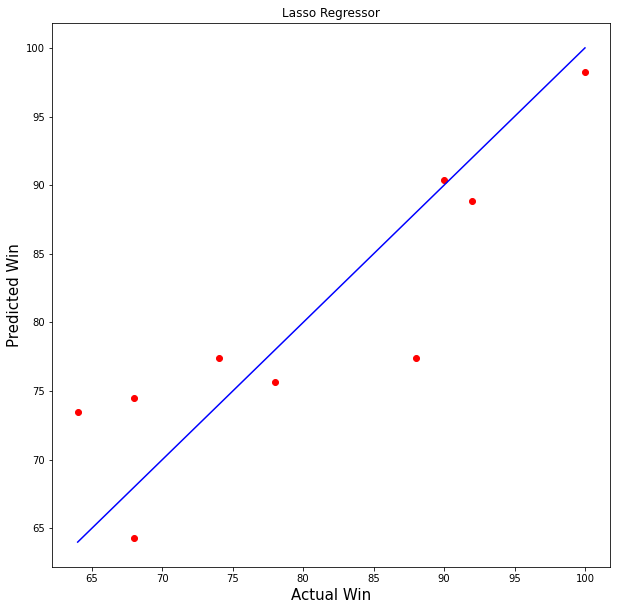

In [130]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Win', fontsize=15)
plt.ylabel('Predicted Win', fontsize=15)
plt.title("Lasso Regressor")
plt.show()

Plotting Actual win vs Predicted win. Here the blue line represents the actual win and red dots are the predicted win.